
# INN Hotels Group - Machine Learning Data Analysis 

## Libraries

In [1]:
# Importing libraries
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, \
    make_scorer, f1_score, recall_score, precision_score

# plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm

## Loading the dataset

In [2]:
# Importing the dataset

hotel = pd.read_csv('INNHotelsGroup.csv')

In [3]:
# Checking the dataset
data = hotel.copy()
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.shape

(36275, 19)

In [6]:
data.duplicated().sum()

# There are no duplicate rows in the dataset

0

In [7]:
# Drop the Booking_ID column
data.drop(['Booking_ID'], axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* We have two years of data, 2017 and 2018.
* At least 75% of the customers are not repeating customers.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

## Exploratory Data Analysis

In [9]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=50):
    """ 
    Boxplot and histogram combined
    
    data : dataframe
    feature : dataframe column
    figsize : size of figure
    ked : kdeplot boolean
    bins : number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # Share x-axis
        figsize=figsize,
        dpi=100,
        gridspec_kw={"height_ratios": (0.25, 0.75)}  # Heights of the axes proportions
    )

    sns.boxplot(
        data=data,
        width=0.4,
        x=feature,
        ax=ax_box,
        showmeans=True,  # Show the arithmetic mean,
        color='red'
    )

    sns.histplot(
        data=data,
        x=feature,
        ax=ax_hist,
        kde=kde,  # kde plot
        bins=bins
    )

    # Add a line for the mean.
    ax_hist.axvline(
        data[feature].mean(),
        color='green',
        linestyle='--'
    )

    # Add a line for the median.
    ax_hist.axvline(
        data[feature].median(),
        color='black',
        linestyle='-'
    )

In [10]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data : dataframe
    feature : dataframe column
    perc : True for percentage, False for count
    n : how many categories to show
    """

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)

    ax = sns.countplot(data=data, x=feature,
                       palette='Paired',
                       order=data[feature].value_counts().index[:n]
                       )

    for p in ax.patches:
        if perc == True:
            lable = f"{p.get_height() / total * 100:.2f}%\n"
        else:
            lable = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(lable, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(feature, fontsize=14, weight='bold')
    plt.ylabel('Count', fontsize=14, weight='bold')

    plt.show()

In [11]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    
    data : dataframe
    predictor : independent variable
    target : target variable
    """

    count = data[predictor].nunique()
    # count is the number of categories in the predictor variable

    sorter = data[target].value_counts().index[-1]
    # sorter is the category with the lowest number of bookings

    tab_1 = pd.crosstab(data[predictor],
                        data[target],
                        margins=True).sort_values(by=sorter,
                                                  ascending=False)
    # tab_1 is the cross tabulation table of the predictor and target variables

    print(tab_1)
    print('-' * 60)

    # plt.figure(figsize=(12, 8), dpi=100)

    tab = pd.crosstab(data[predictor],
                      data[target],
                      normalize='index').sort_values(by=sorter,
                                                     ascending=False)
    # tab is the normalized cross tabulation table of the predictor and target variables, to build the percentage

    fig, ax = plt.subplots(figsize=(count + 5, 5), dpi=100)

    tab.plot(kind="bar", stacked=True, ax=ax)

    # plot a stacked bar chart

    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0, fontsize=12)

    plt.show()

In [12]:
# function to plot distribution of the data

def distribution_plot_wrt_target(data, predictor, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=100)
    # create a figure with 2 rows and 2 columns

    target_unique = data[target].unique()
    # get the unique values of the target variable

    axes[0, 0].set_title('Distribution of target for target =' + str(target_unique[0]))
    # set the title of the plot

    sns.histplot(
        data=data[data[target] == target_unique[0]],
        x=predictor,
        kde=True,
        ax=axes[0, 0],
        color='teal',
        stat='density'
    )
    # plot distribution of the predictor variable for target = 0

    axes[0, 1].set_title('Distribution of target for target =' + str(target_unique[1]))
    sns.histplot(
        data=data[data[target] == target_unique[1]],
        x=predictor,
        kde=True,
        ax=axes[0, 1],
        color='orange',
        stat='density'
    )
    # plot distribution of the predictor variable for target = 1

    axes[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 0],
        palette='gist_rainbow'
    )
    # plot boxplot of the predictor variable w.r.t target variable

    axes[1, 1].set_title('Boxplot w.r.t target without outliers')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 1],
        showfliers=False,
        palette='gist_rainbow')
    # plot boxplot of the predictor variable w.r.t target variable without outliers

    plt.tight_layout()
    plt.show()


## Univariate Analysis

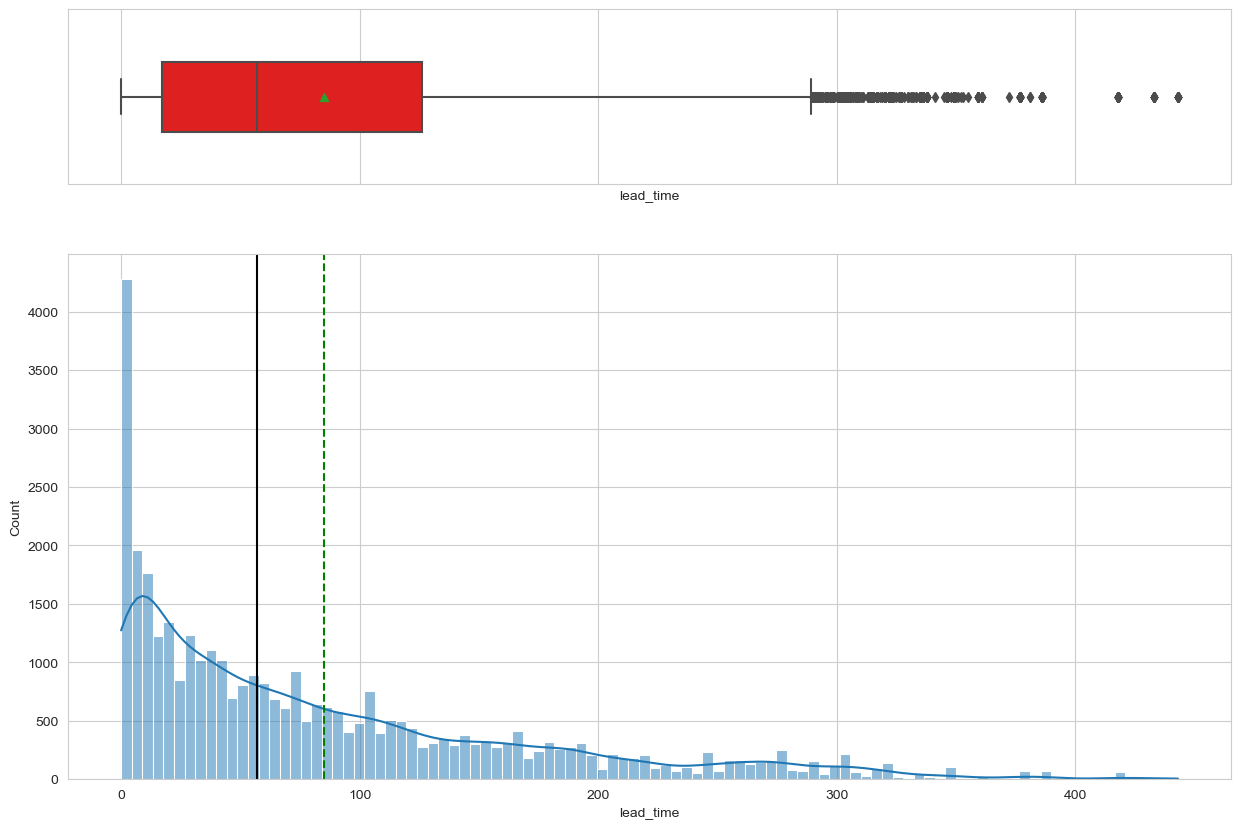

In [13]:
# The distribution of lead time
histogram_boxplot(data, 'lead_time', kde=True, bins=100)

- The distribution of lead time is right-skewed, and there are many outliers.
- Some customers made booking around 500 days in advance, but most of the customers made booking around 0-200 days in advance.
- Many customers have made the booking on the same day of arrival as well.

### Observations on average price per room

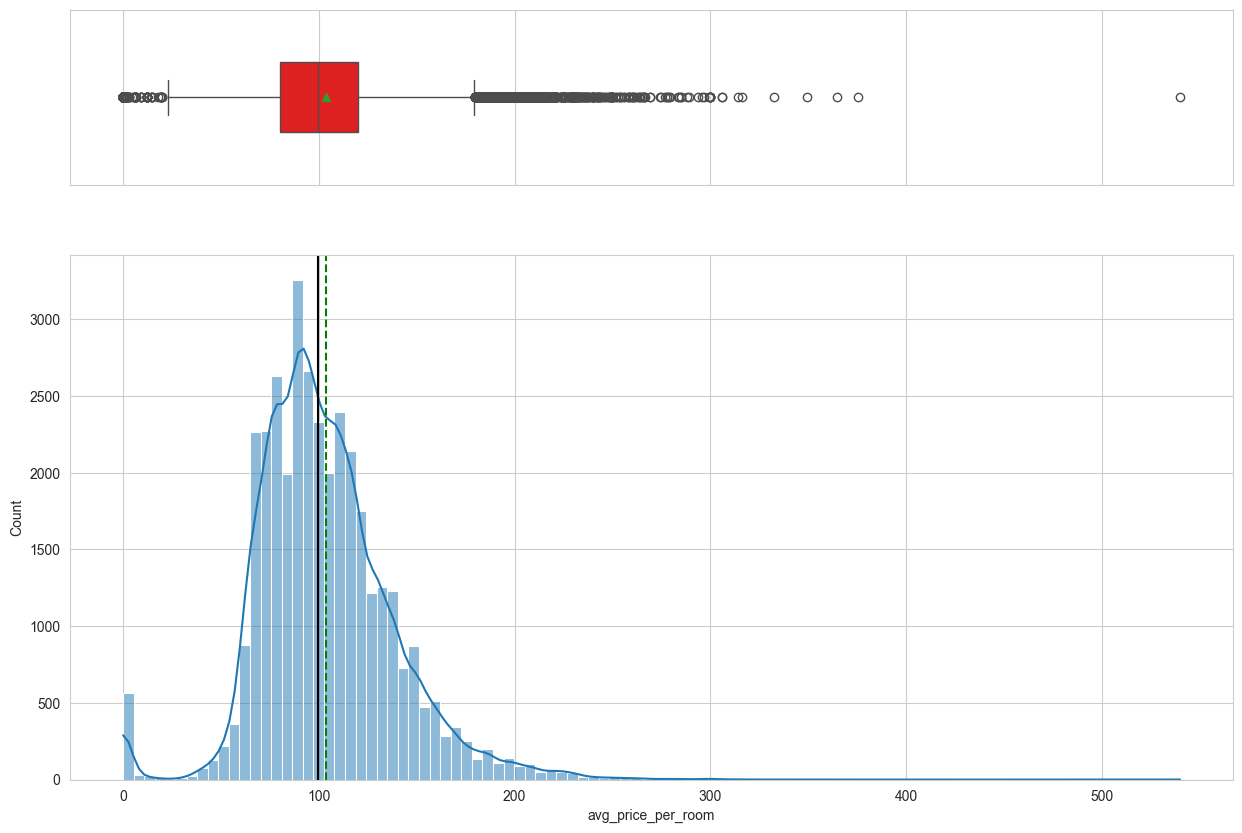

In [83]:
# The distribution of average price per room
histogram_boxplot(data, 'avg_price_per_room', kde=True, bins=100)

* The distribution of average price per room is skewed to right. There are outliers on both sides.
* The average price of a room is around ~100 Euros.
* There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. 
* Instead of dropping it, we will clip this to the upper whisker (Q3 + 1.5 * IQR).
* Interestingly some rooms have a price equal to 0. Let's check them.

In [84]:
data[data['avg_price_per_room'] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


* There are 545 observations where the average price of the room is 0.
* In the market segment column, it looks like many of the observations are complementary.

In [85]:
data.loc[data['avg_price_per_room'] == 0, 'market_segment_type'].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [86]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR

print(f"Upper Whisker: {Upper_Whisker}")

Q1: 80.3
Q3: 120.0
IQR: 39.7
Upper Whisker: 179.55


In [87]:
# assigning the outliers tha value of upper whisker
data.loc[data['avg_price_per_room'] > 500, 'avg_price_per_room'] = Upper_Whisker

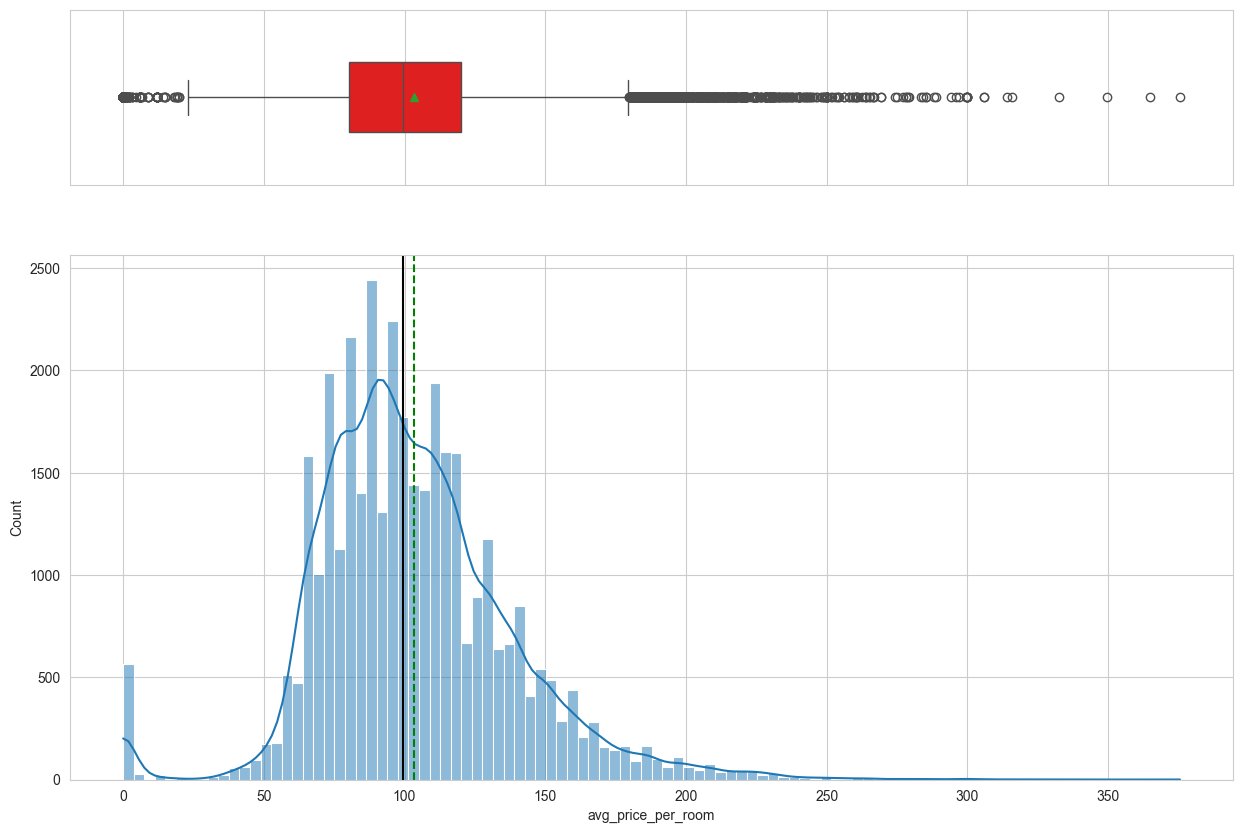

In [88]:
# After clipping the outliers

histogram_boxplot(data, 'avg_price_per_room', kde=True, bins=100)

### Observations on the number of previous cancellations

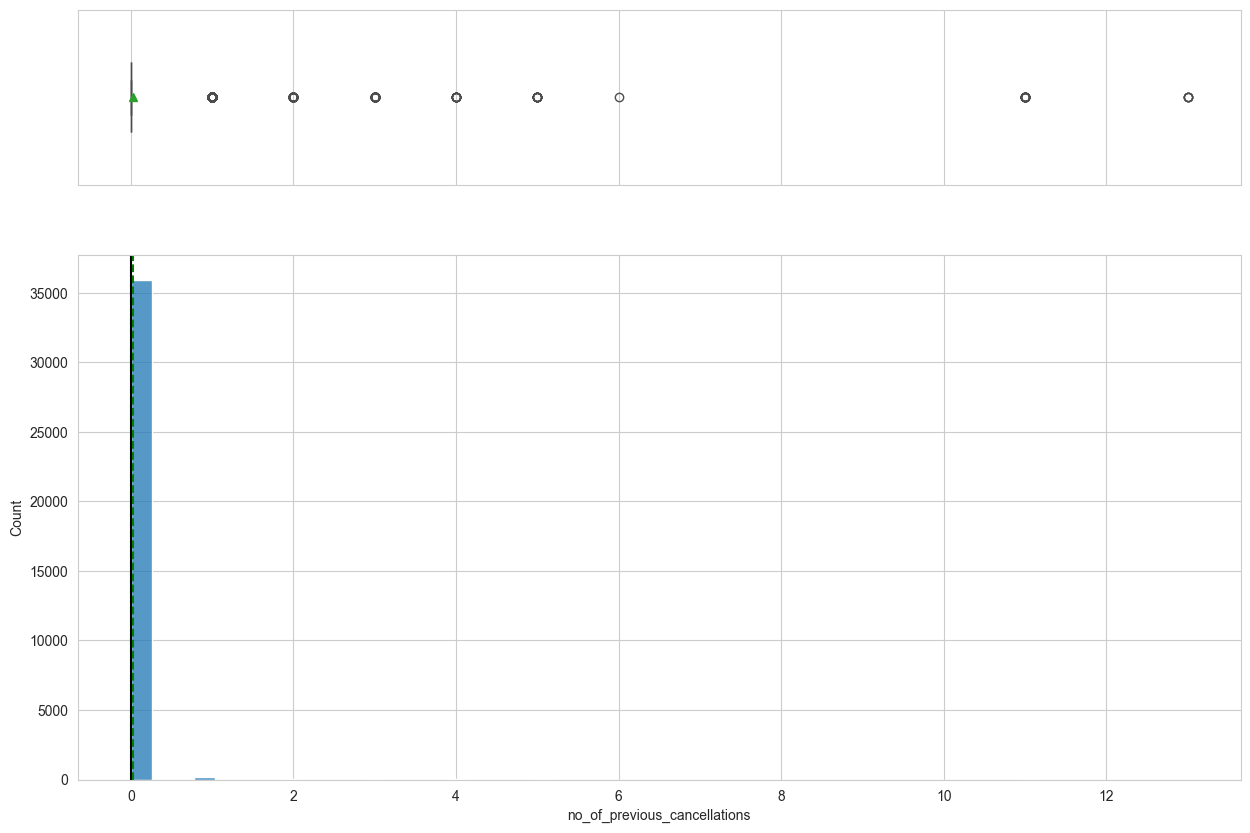

In [89]:
# The distribution of number of adults
histogram_boxplot(data, 'no_of_previous_cancellations', kde=False)

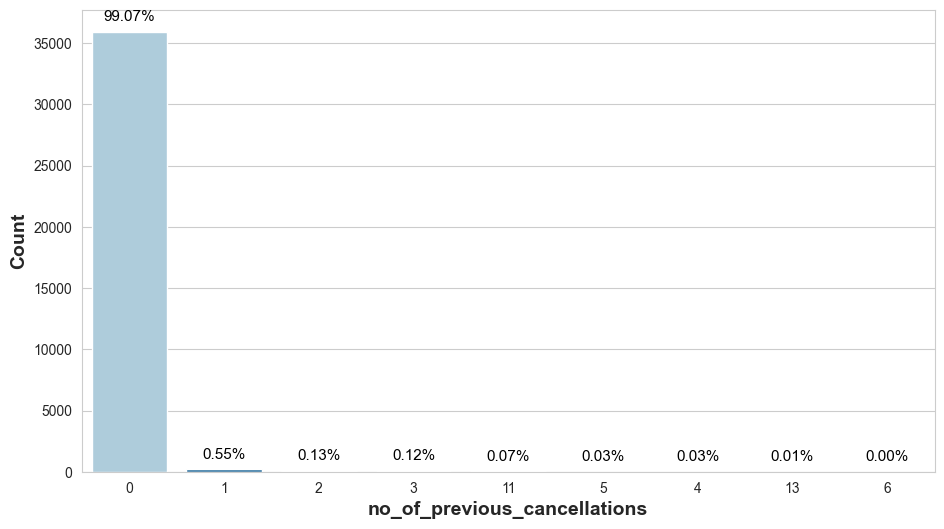

In [90]:
# The distribution of previous cancellations
labeled_barplot(data, 'no_of_previous_cancellations', perc=True)

* Very few customers have more than one cancellation.
* Some customers canceled more than 12 times.

### Observations on number of previous booking not canceled

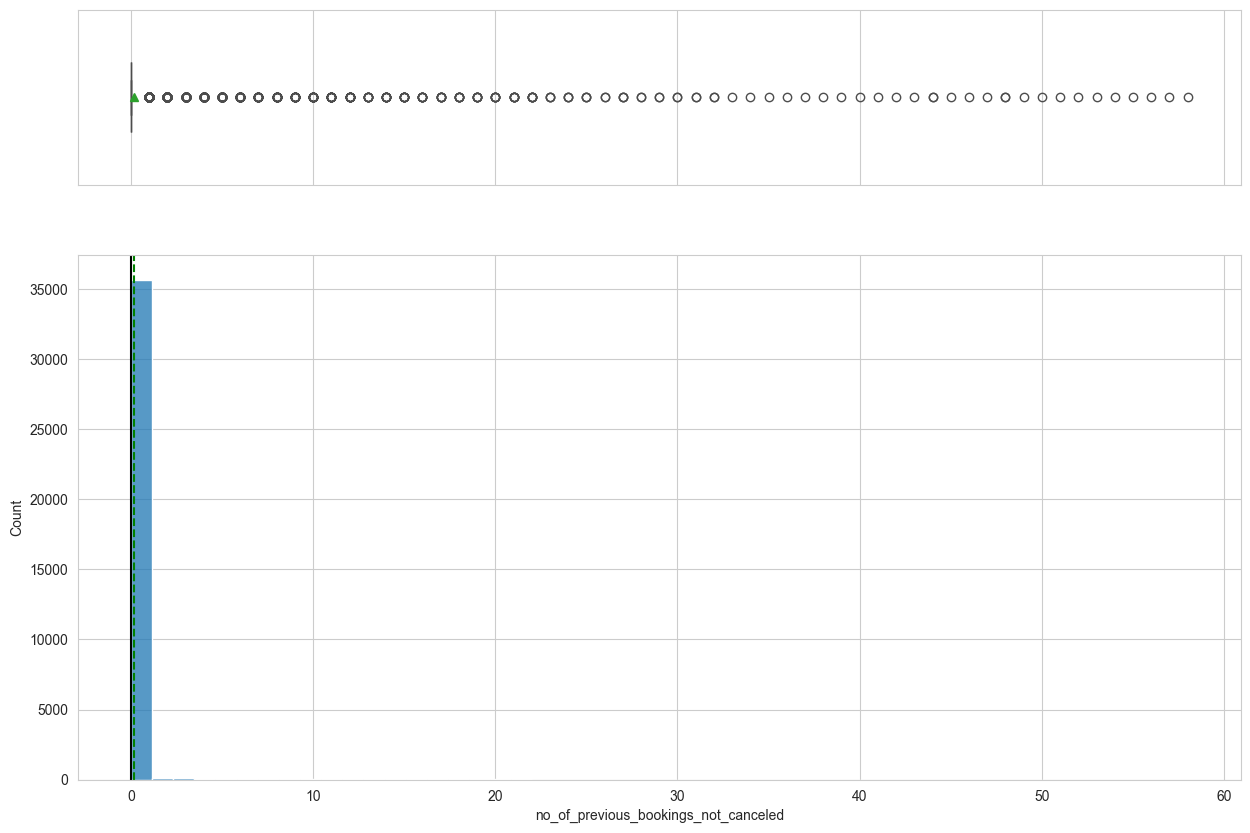

In [91]:
# The distribution of number of previous booking not canceled
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled', kde=False, bins=50)

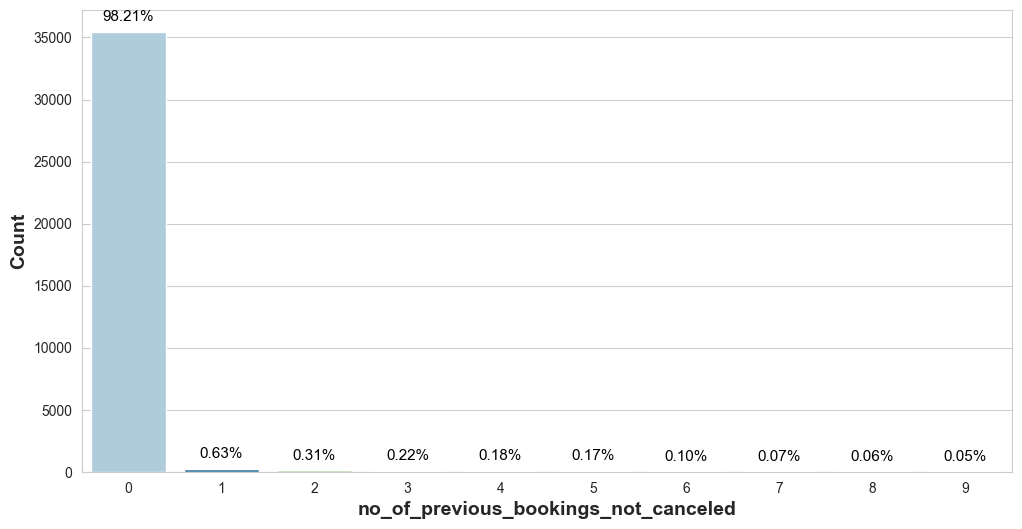

In [92]:
# The distribution of previous booking not canceled
labeled_barplot(data.loc[data.no_of_previous_bookings_not_canceled < 10], 'no_of_previous_bookings_not_canceled',
                perc=True)

* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings around 60 times.

### Observations on the number of adults

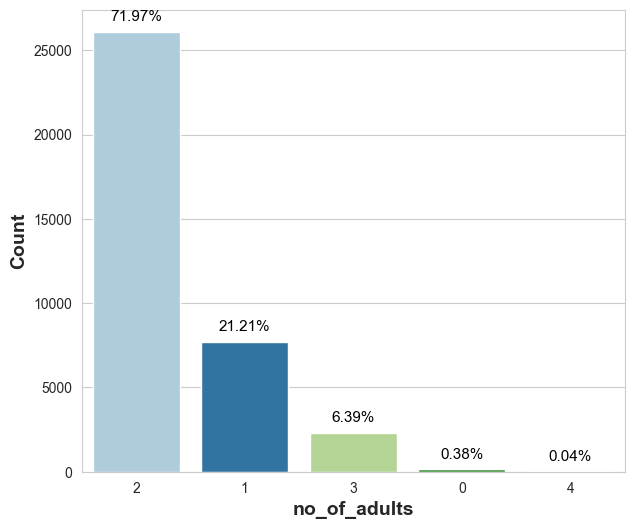

In [93]:
# The distribution of number of adults
labeled_barplot(data, 'no_of_adults', perc=True)

* 72% of the bookings were made for 2 adults.

### Observations on the number of children

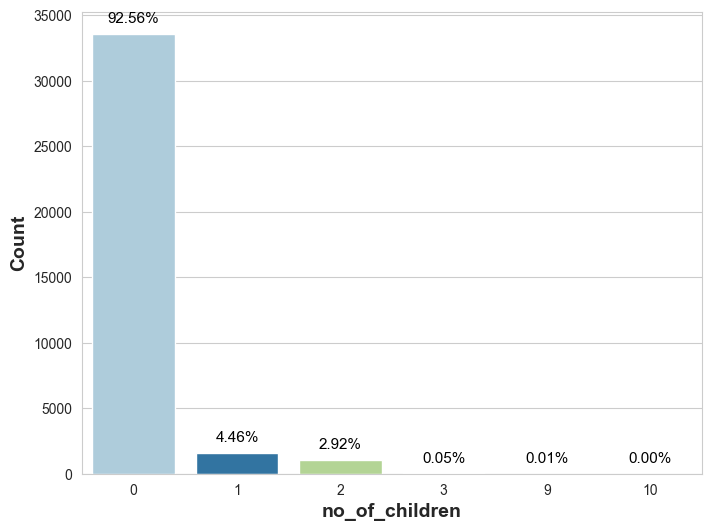

In [94]:
labeled_barplot(data, 'no_of_children', perc=True)

* 92% of the bookings were made for 0 children.
* 6% of the bookings were made for 1 or more child.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [95]:
# replacing the values of number of children greater than 3
data.loc[data['no_of_children'] > 3, 'no_of_children'] = 3

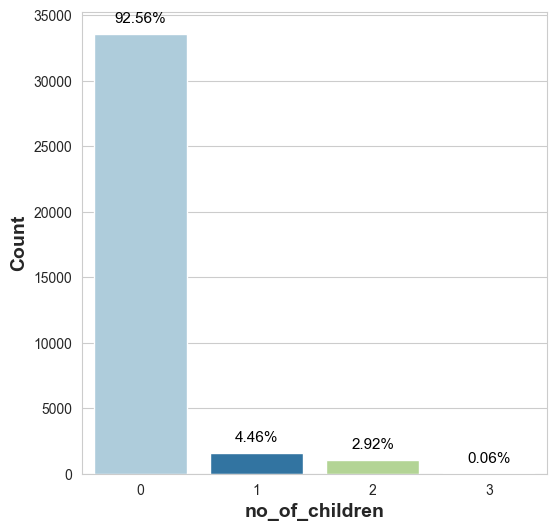

In [96]:
# After replacing the values
labeled_barplot(data, 'no_of_children', perc=True)

### Observations on number of week nights

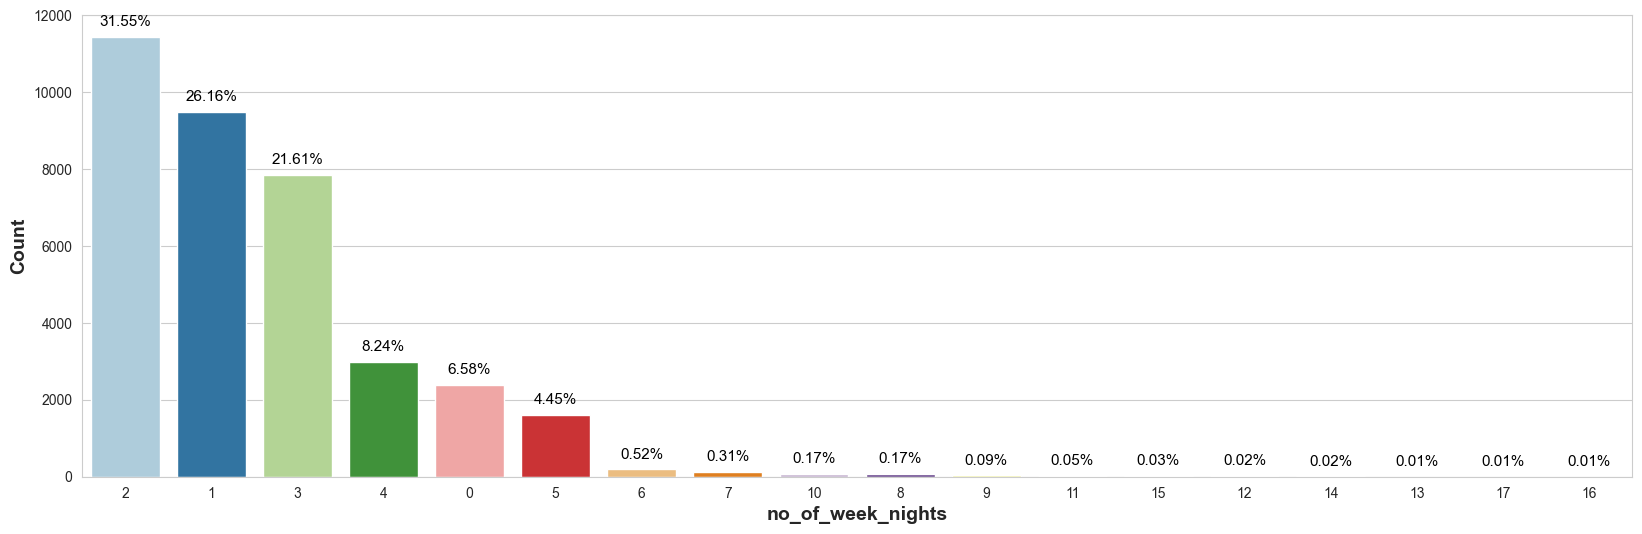

In [97]:
# The distribution of the number of week nights
labeled_barplot(data, 'no_of_week_nights', perc=True)

* Most bookings are made for 2 nights (31.5%) followed by 1 night (26.2%).
* A very less proportion of customers made the booking for more than 5 days.

### Observations on number of weekend nights

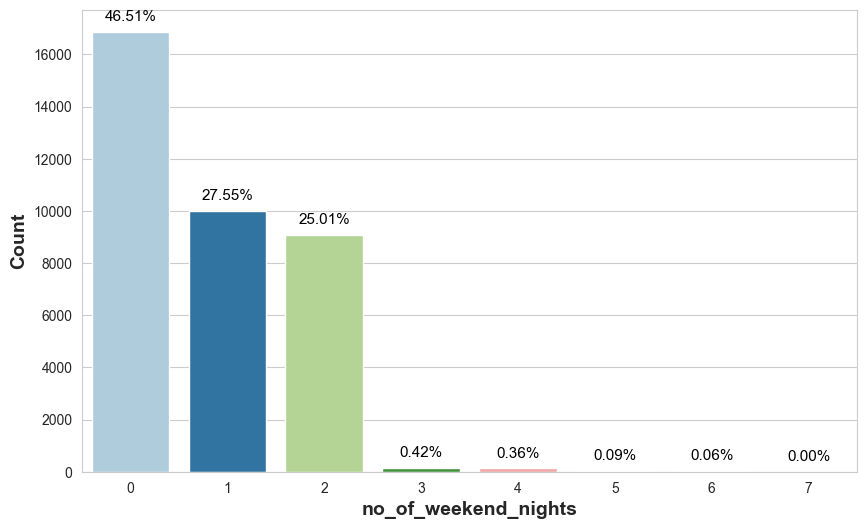

In [98]:
# The distribution of the number of weekend nights
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

* 46.5% of the customers do not plan to spend the weekend in the hotel.
* The percentage of customers planning to spend 1 or 2 weekends in the hotel is almost the same about 26%.

### Observations on required car parking space

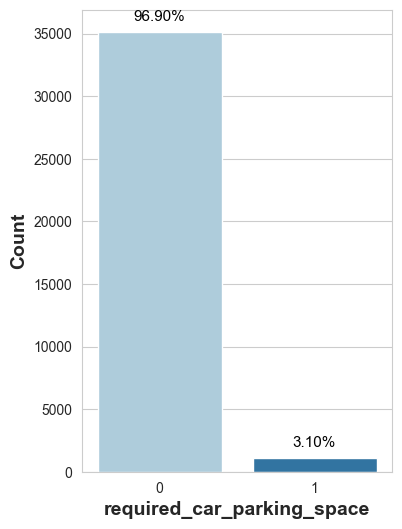

In [99]:
# The distribution of required car parking space
labeled_barplot(data, 'required_car_parking_space', perc=True)

* 96.90% of the customers do not require car parking space.
* The parking option is not very important for the customers, but we still should consider the customer needs on the parking space.

### Observations on type of meal plan

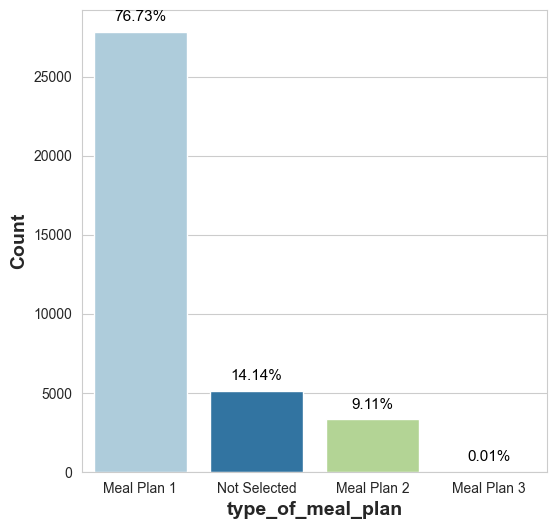

In [100]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

* Most of the customers prefer meal plan 1 that is only breakfast.
* 14.1% of the customers didn't select a meal plan.
* Only 0.01% of the customers selected meal plan 4.

### Observations on room type reserved

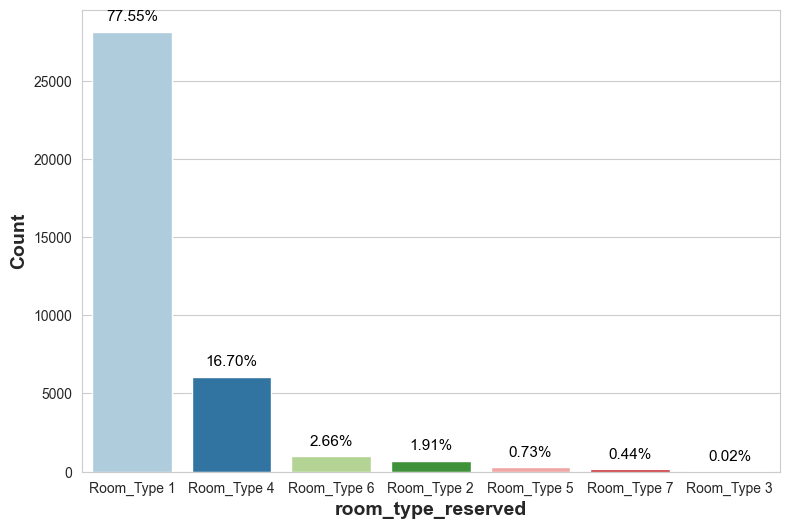

In [101]:
# The distribution of room type reserved
labeled_barplot(data, 'room_type_reserved', perc=True)

* Around 77% of the customers booked Room_Type 1 followed by 17% of the customers booking Room_Type 4.
* Then other room types are booked by less than 3% of the customers.

### Observations on arrival month

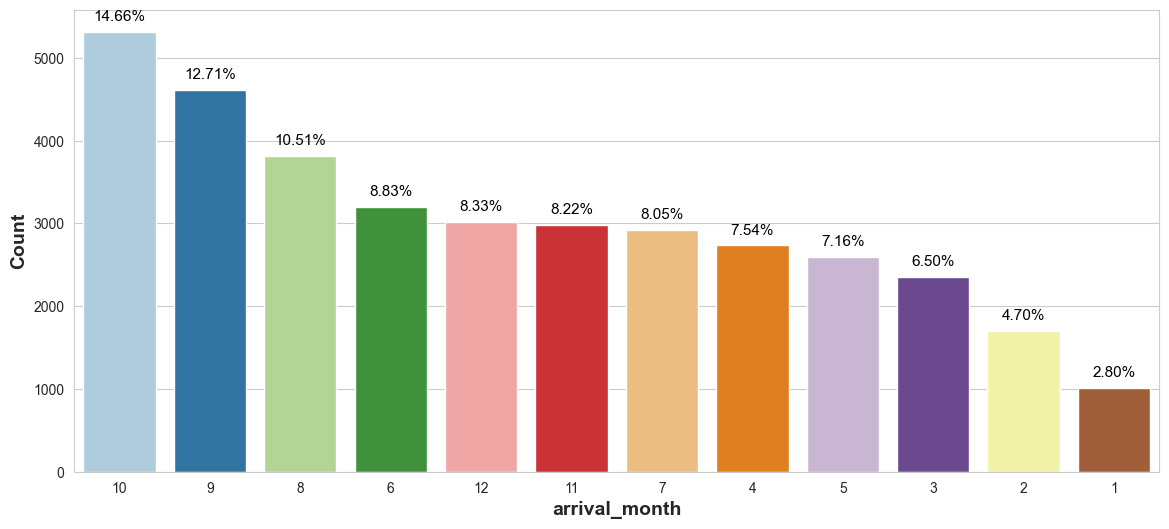

In [102]:
# The distribution of arrival month
labeled_barplot(data, 'arrival_month', perc=True)

* October is the busiest month for the hotel followed by September.
* 14.7% of the bookings were made in October.

### Observations on repeated guest

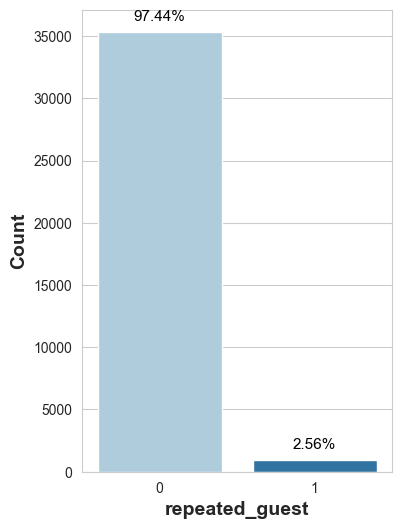

In [103]:
# The distribution of repeated guest
labeled_barplot(data, 'repeated_guest', perc=True)

* Only 2.56% of the customers are repeated guests which means that the return customers are less.

### Observations on market segment type

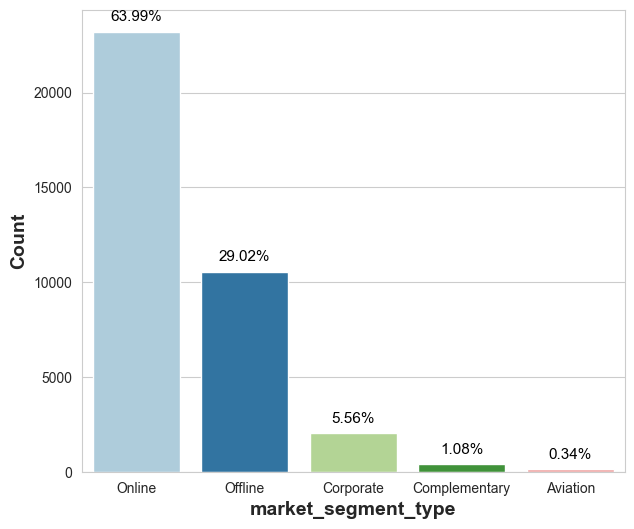

In [104]:
# The distribution of market segment type
labeled_barplot(data, 'market_segment_type', perc=True)

* 64% of the bookings were made online.
* 30% of the bookings were made offline.
* 6% of the bookings were made through corporate channels.
* 1.08% of the bookings were made through complementary channels which made the average price of the room 0.

### Observations on number of special requests

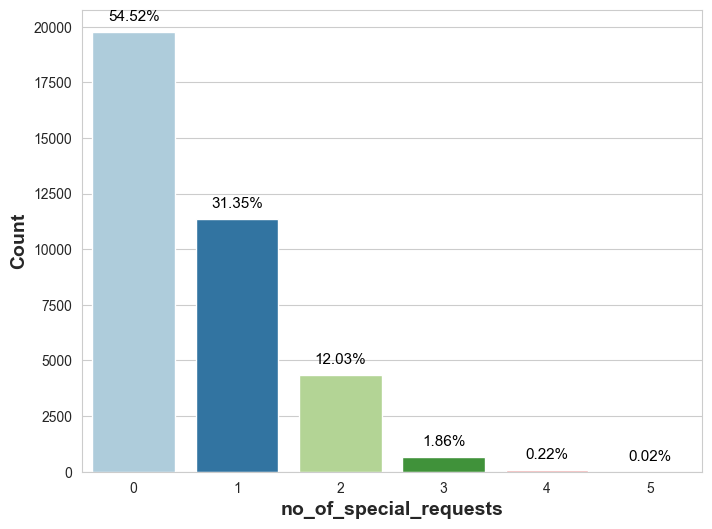

In [105]:
# The distribution of number of special requests
labeled_barplot(data, 'no_of_special_requests', perc=True)

* 54.5% of the customers generally do not make any requests while booking a hotel room.
* 31.4% of the customers make 1 request.
* Over 13% of the customers make more than 2 requests.

### Observations on booking status

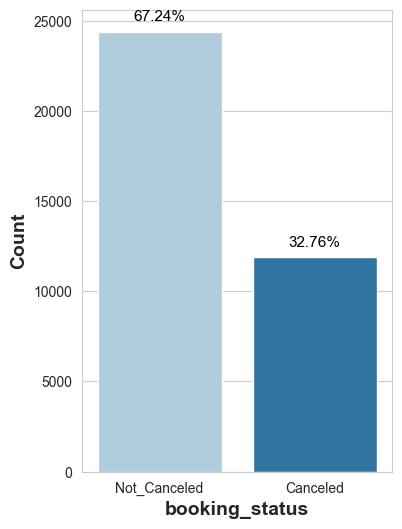

In [106]:
# The distribution of booking status
labeled_barplot(data, 'booking_status', perc=True)

* 32.8% of the bookings were canceled by the customers.
* This is a very high percentage of cancellations.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [107]:
data['booking_status'] = data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [108]:
data.head(20)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,1
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,0
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,0
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,0
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,0


In [109]:
data['booking_status'].value_counts()

booking_status
0    24390
1    11885
Name: count, dtype: int64

## Bivariate Analysis

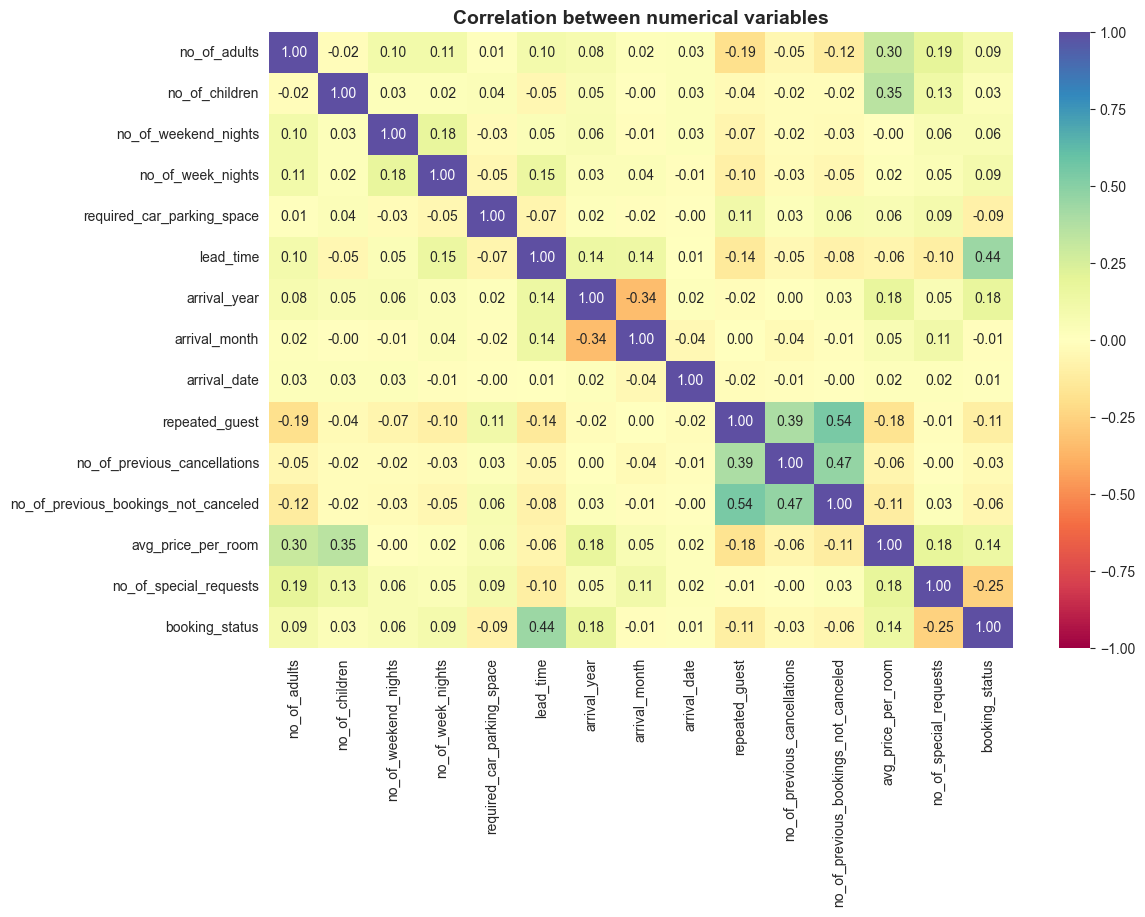

In [110]:
# The correlation between numerical variables

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    data[cols_list].corr(),
    fmt='.2f',
    annot=True,
    cmap='Spectral',
    vmin=-1,
    vmax=1
)

plt.title('Correlation between numerical variables', fontsize=14, weight='bold')
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
* This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a negative correlation between average room price and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest. 
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation. We will analyze it further.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease. We will analyze it further.

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

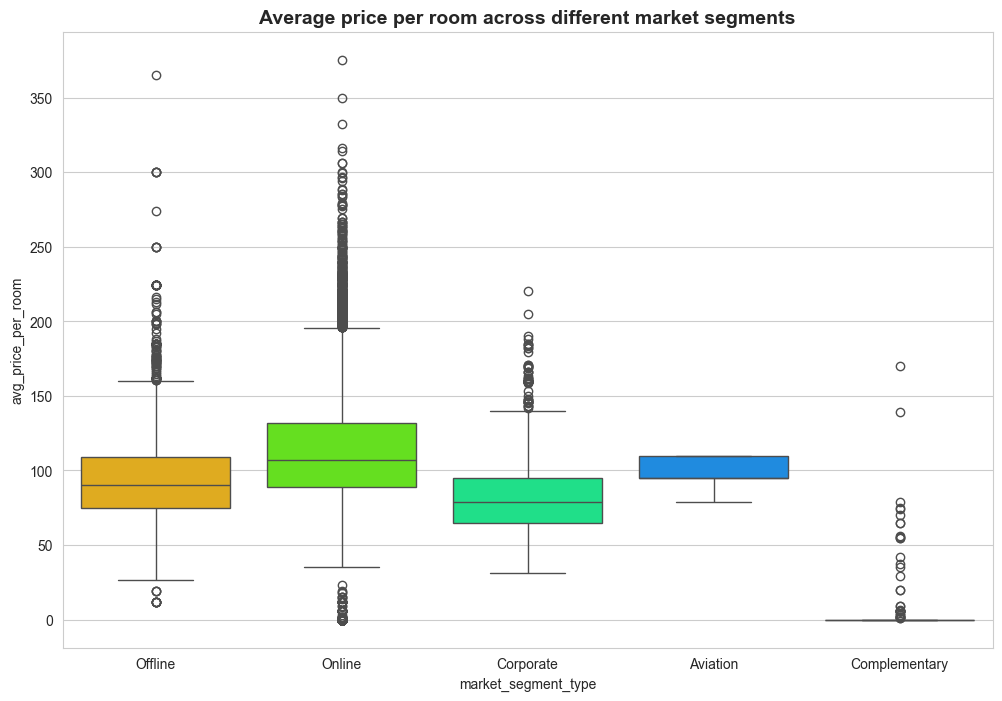

In [111]:
# creating a new column for market segment type
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(data=data,
            x='market_segment_type',
            y='avg_price_per_room',
            palette='gist_rainbow')

plt.title('Average price per room across different market segments', fontsize=14, weight='bold')
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------


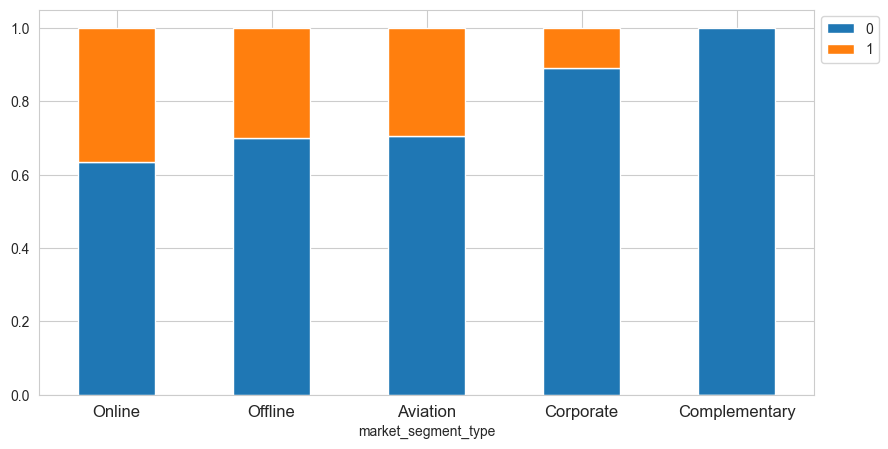

In [112]:
stacked_barplot(data, 'market_segment_type', 'booking_status')

* Around 40% of the online booking were canceled.
* Bookings made offline are less prone to cancellations.
* Corporate segment shows very low cancellations.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------


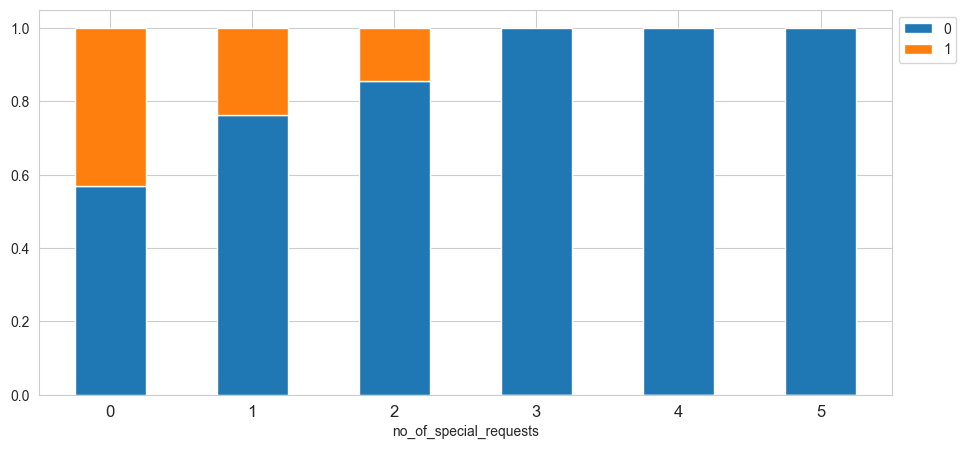

In [113]:
stacked_barplot(data, 'no_of_special_requests', 'booking_status')

* If a customer has made more than 2 requests there's a very high chance that the booking will not be canceled.

**Let's see if the special requirements made by the customer impacts the price per room**

Text(0.5, 1.0, 'Average price per room across different number of special requests')

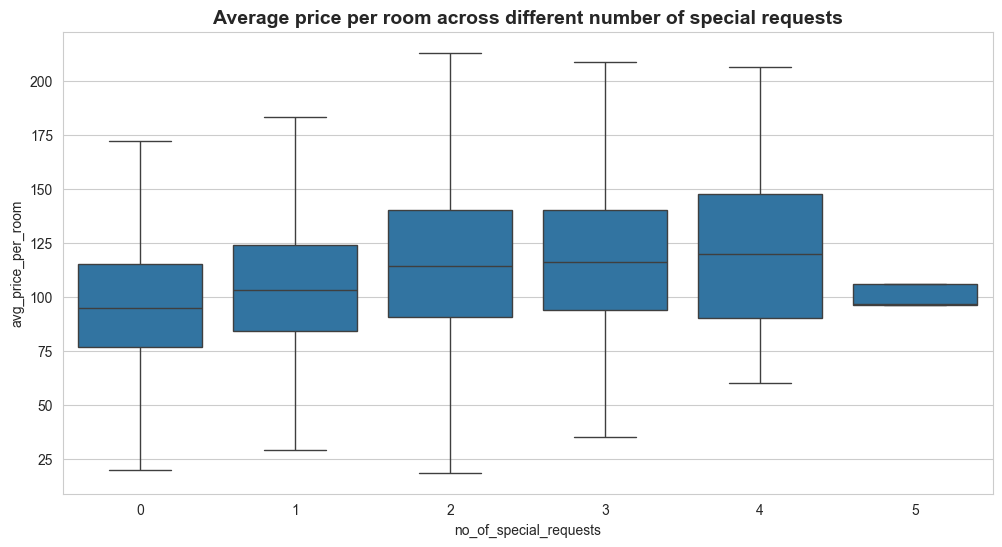

In [114]:
plt.figure(figsize=(12, 6), dpi=100)

sns.boxplot(data=data,
            x='no_of_special_requests',
            y='avg_price_per_room',
            showfliers=False  # removing outliers
            )

plt.title('Average price per room across different number of special requests', fontsize=14, weight='bold')

* The median prices of the rooms where some special requests were made by the customers are slightly higher than the rooms where customer didn't make any requests.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

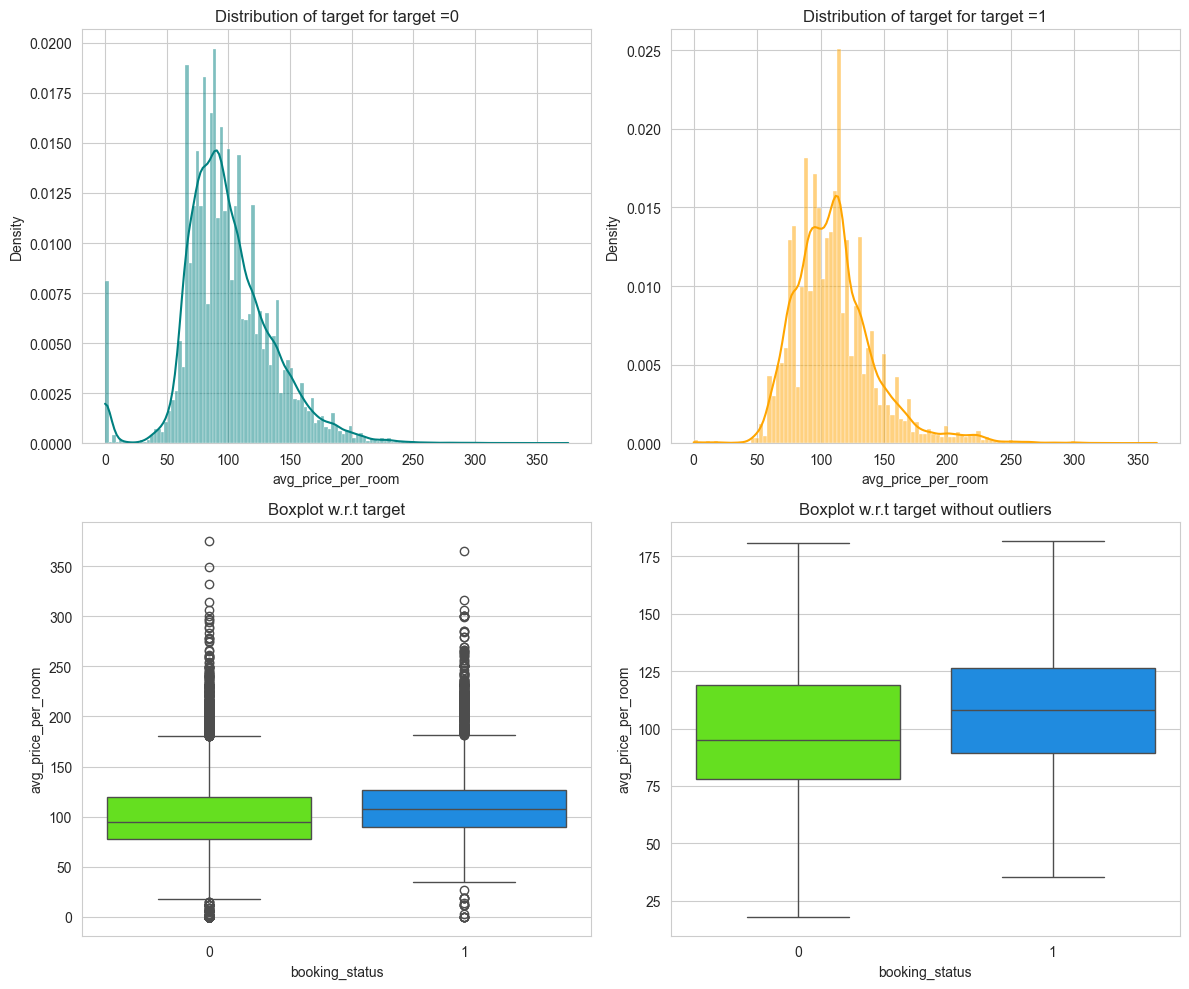

In [115]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

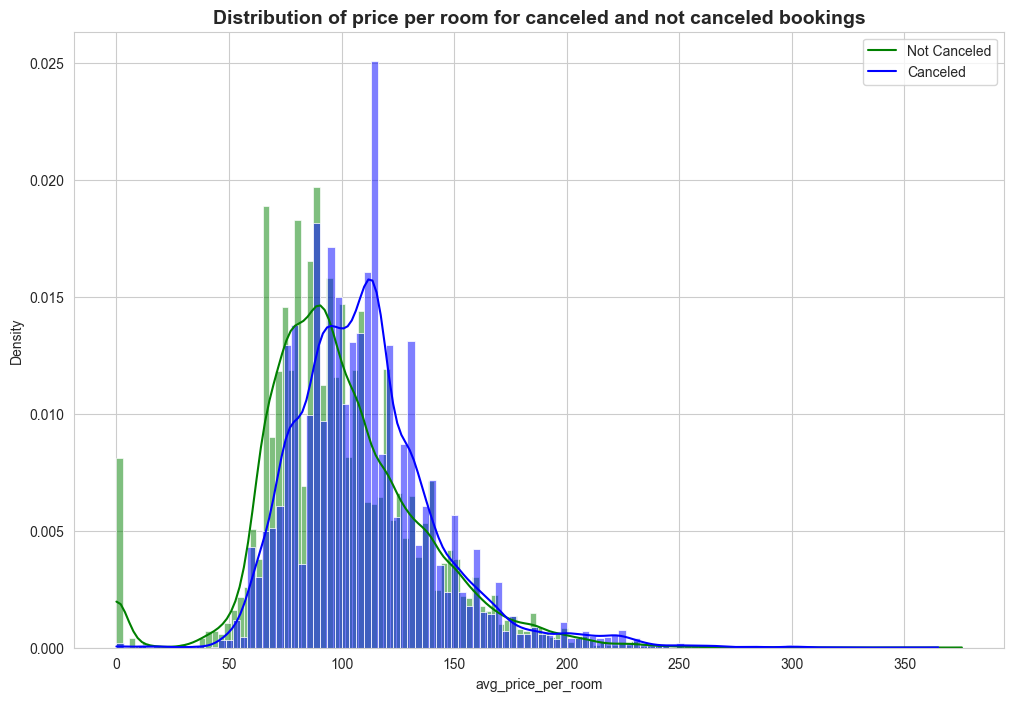

In [116]:
plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(data=data[data['booking_status'] == 0], x='avg_price_per_room', kde=True, color='green', stat='density')

sns.histplot(data=data[data['booking_status'] == 1], x='avg_price_per_room', kde=True, color='blue', stat='density')

plt.title('Distribution of price per room for canceled and not canceled bookings', fontsize=14, weight='bold')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

* The distribution of price for canceled bookings and not canceled bookings is quite similar.
* The prices for the canceled bookings are slightly higher than the bookings which were not canceled.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

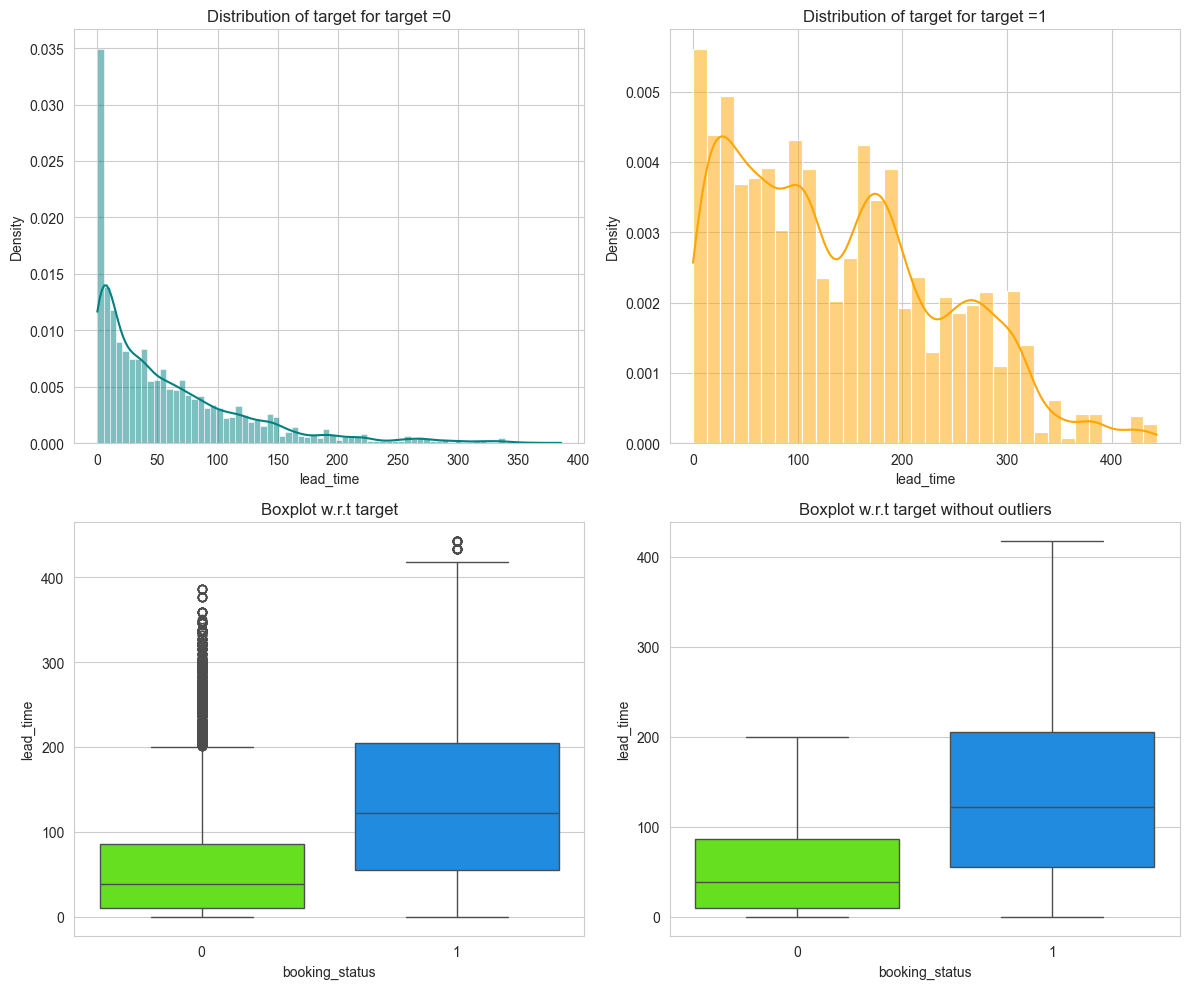

In [117]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

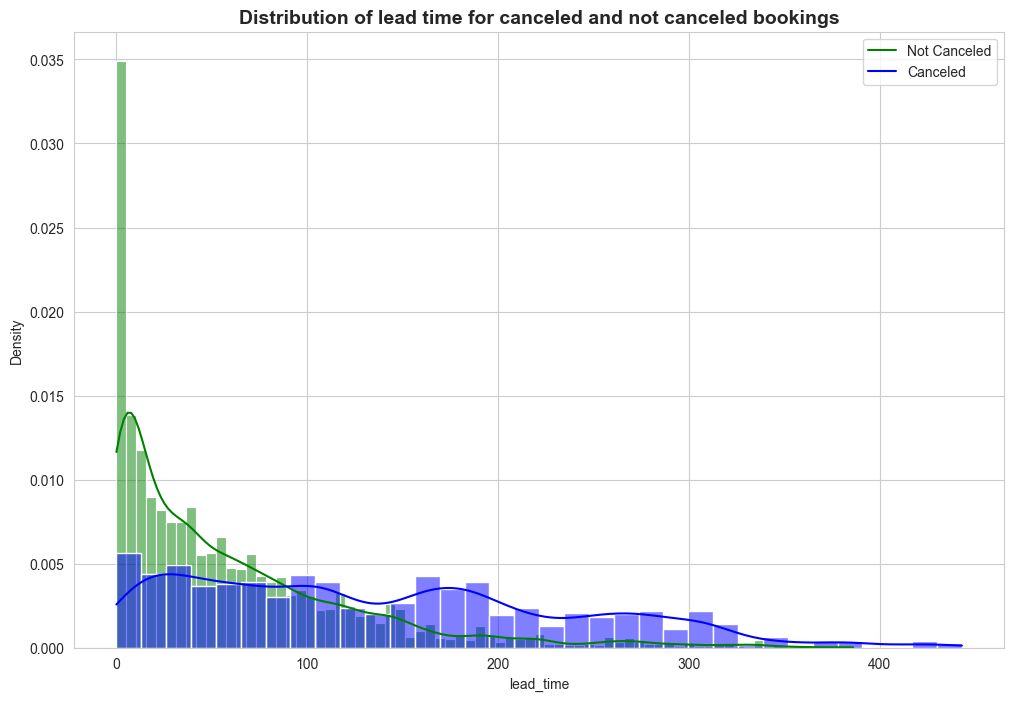

In [118]:
plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(data=data[data['booking_status'] == 0], x='lead_time', kde=True, color='green', stat='density')

sns.histplot(data=data[data['booking_status'] == 1], x='lead_time', kde=True, color='blue', stat='density')

plt.title('Distribution of lead time for canceled and not canceled bookings', fontsize=14, weight='bold')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
* Higher the lead time higher are the chances of a booking being canceled.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [119]:
# creating a new dataframe of the customers who traveled with their families
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]

family_data.shape

(28441, 18)

In [120]:
family_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


In [121]:
# creating a new column for the number of family members
family_data["no_of_family_members"] = family_data["no_of_adults"] + family_data["no_of_children"]

family_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,1,2


booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------


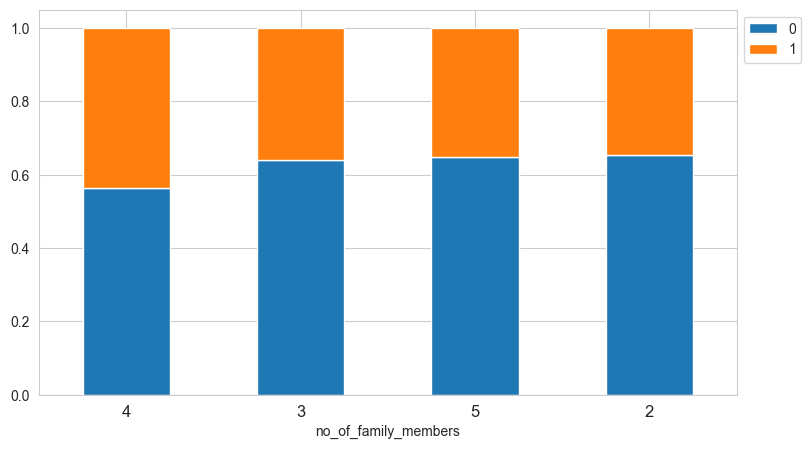

In [122]:
stacked_barplot(family_data, 'no_of_family_members', 'booking_status')

* There's about a 40% chance of a booking getting canceled if the booking is made for 4 family members.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [123]:
stay_data = data[(data['no_of_week_nights'] > 0) & (data['no_of_weekend_nights'] > 0)]
stay_data.shape

(17094, 18)

In [124]:
stay_data['total_days'] = stay_data['no_of_week_nights'] + stay_data['no_of_weekend_nights']

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------


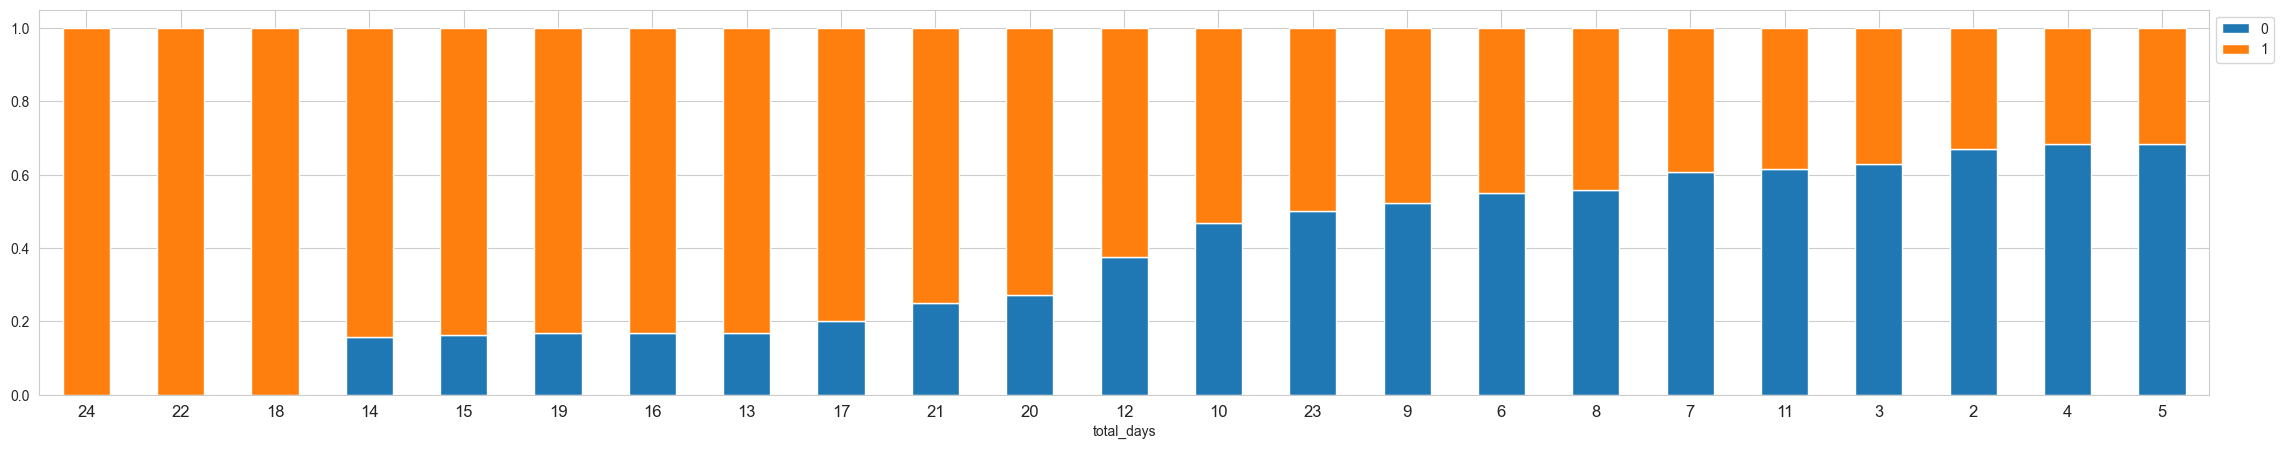

In [125]:
stacked_barplot(stay_data, 'total_days', 'booking_status')

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.
* And we could see that the chances of cancellation are very high if the customer planned to stay for over 20 days.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------


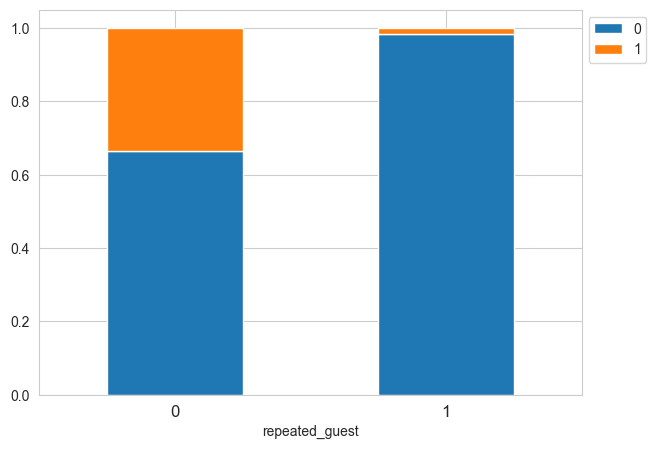

In [126]:
stacked_barplot(data, 'repeated_guest', 'booking_status')

* There are very few repeat customers but the cancellation among them is very less.
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
* A loyal guest is usually more profitable for the business because they are more familiar with what is on offer at a hotel they have visited before.
* Attracting new customers is tedious and costs more as compared to a repeated guest.

**Let's find out what are the busiest months in the hotel.**

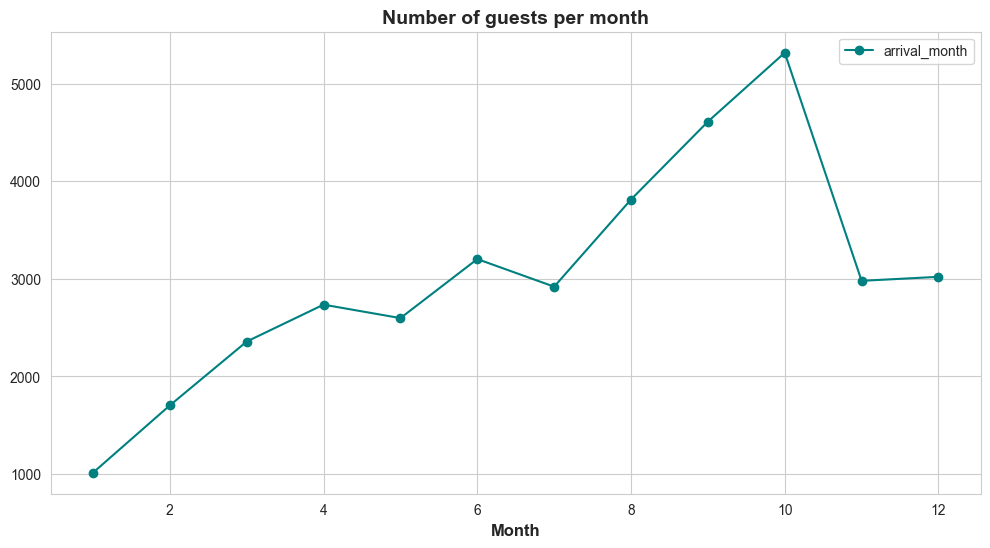

In [127]:
# grouping the data on arrival months and extracting the count of bookings

monthly_data = data.groupby('arrival_month').agg({'arrival_month': 'count'})
monthly_data

monthly_data.plot(kind='line', figsize=(12, 6), marker='o', color='teal')

plt.title('Number of guests per month', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12, weight='bold')

plt.show()

* The trend shows the number of bookings remains consistent from April to July and the hotel sees around 3000 to 3500 guests.
* Most bookings were made in October - more than 5000 bookings. 
* Least bookings were made in January - around 1000 bookings.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------


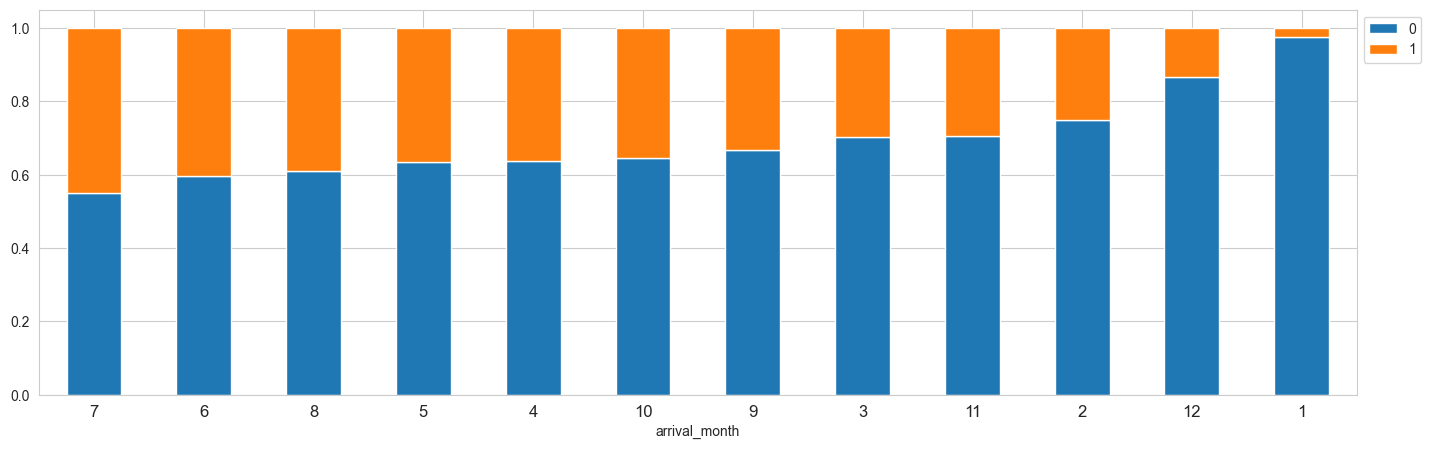

In [128]:
stacked_barplot(data, 'arrival_month', 'booking_status')

* We see that even though the highest number of bookings were made in September and October - around 40% of these bookings got canceled.
* Least bookings were canceled in December and January - customers might have traveled to celebrate Christmas and New Year.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

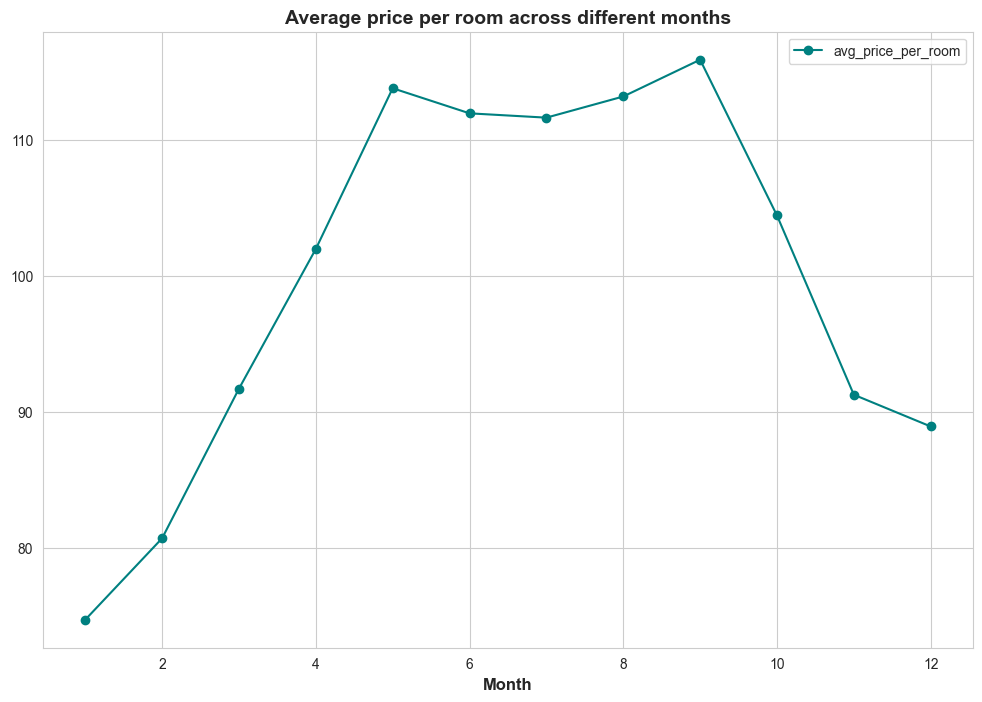

In [129]:
avg_price_month = data.groupby('arrival_month').agg({'avg_price_per_room': 'mean'})

avg_price_month.plot(kind='line', figsize=(12, 8), marker='o', color='teal')

plt.title('Average price per room across different months', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12, weight='bold')

plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the numerical columns.

In [130]:
# outlier detection using boxplot
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# dropping release_year column
numerical_cols.remove('booking_status')

numerical_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

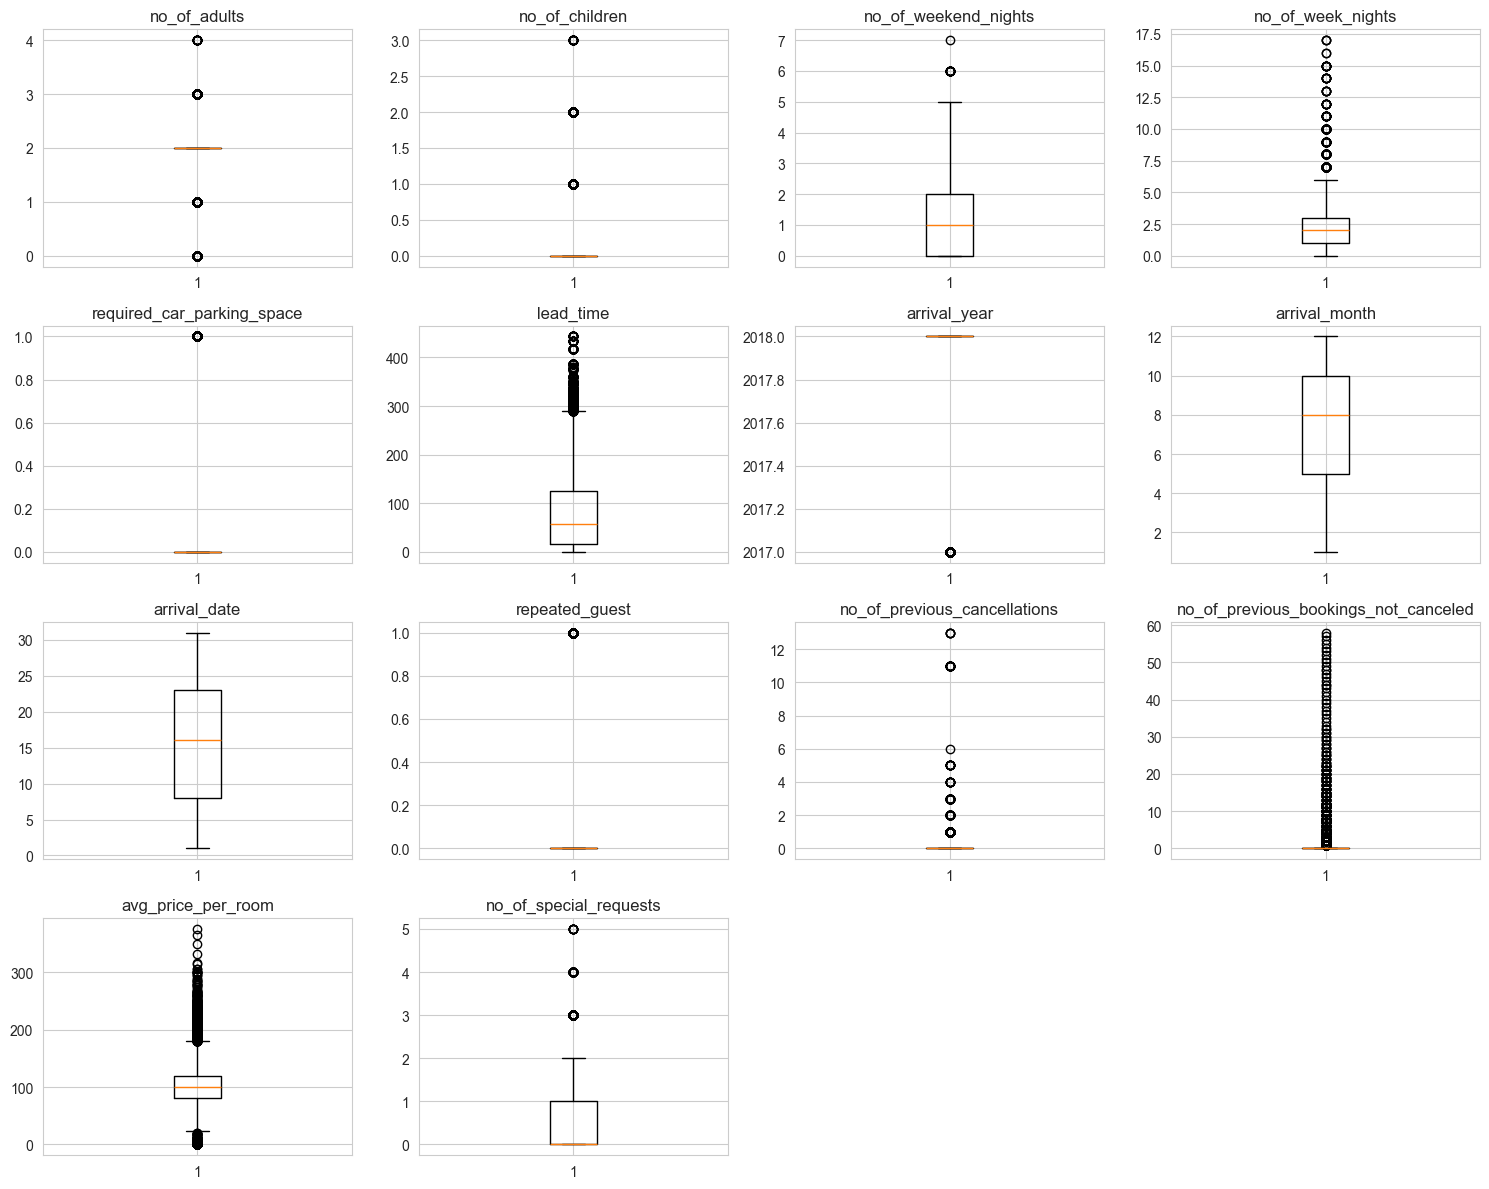

In [131]:
plt.figure(figsize=(15, 12), dpi=100)

for i in numerical_cols:
    plt.subplot(4, 4, numerical_cols.index(i) + 1)
    plt.boxplot(data[i], whis=1.5)
    plt.tight_layout()
    plt.title(i)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

## Model Building

## Logistic Regression

### Data Preparation for Logistic Regression

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [132]:
X = data.drop(['booking_status'], axis=1)
y = data['booking_status']

X = sm.add_constant(X)
X = pd.get_dummies(X, drop_first=True)

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [134]:
print('Shape of training set: ', X_train.shape)
print('Shape of test set: ', X_test.shape)
print('----------------------DIVIDED-------------------------')
print('The percentage of classes in training set: \n', y_train.value_counts(normalize=True))
print('----------------------DIVIDED-------------------------')
print('The percentage of classes in test set: \n', y_test.value_counts(normalize=True))


Shape of training set:  (25392, 28)
Shape of test set:  (10883, 28)
----------------------DIVIDED-------------------------
The percentage of classes in training set: 
 booking_status
0    0.673992
1    0.326008
Name: proportion, dtype: float64
----------------------DIVIDED-------------------------
The percentage of classes in test set: 
 booking_status
0    0.668566
1    0.331434
Name: proportion, dtype: float64


### Logistic Regression Model Building

In [135]:
# fitting logistic regression model
model_logistic = sm.Logit(y_train, X_train.astype(float))

result_logistic = model_logistic.fit()

print(result_logistic.summary())

         Current function value: 0.424648
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.3274
Time:                        09:27:21   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -835.7603    120.118     -6.958      0.000   -1071.187

### Model evaluation criterion

### Model can make wrong predictions as:
Type 1 Error: Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

Type 2 Error: Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [136]:
# define a function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check performance of a classification model built using statsmodels
    
    model : fitted statsmodels model
    predictors : predictors used to fit the model
    target : target variable
    tresholds : probability tresholds to classify the observations as 0 or 1
    """

    # checking which probabilities are greater than the threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # computing accuracy
    recall = recall_score(target, pred)  # computing recall
    precision = precision_score(target, pred)  # computing precision
    f1 = f1_score(target, pred)  # computing f1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc,
         'Recall': recall,
         'Precision': precision,
         'F1 Score': f1},
        index=[0]
    )

    return df_perf

In [137]:
# define a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with the given model, predictors and target
    
    model : fitted statsmodels model
    predictors : predictors used to fit the model
    target : target variable
    tresholds : probability tresholds to classify the observations as 0 or 1
    """

    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:0.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4), dpi=100)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.ylabel('Actual label', fontsize=14, weight='bold')
    plt.xlabel('Predicted label', fontsize=14, weight='bold')

    plt.show()

**Observations**

- Negative values of the coefficient show that the probability of customers canceling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

In [138]:
print('Training Performance\n')
model_performance_classification_statsmodels(result_logistic, X_train, y_train)

Training Performance


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [ ]:
# confusion matrix
confusion_matrix_statsmodels(result_logistic, X_train, y_train)

* The model is performing well on the training data, but the F1 Score is not very high.

In [ ]:
print('Test Performance\n')
model_performance_classification_statsmodels(result_logistic, X_test, y_test)

In [ ]:
# confusion matrix
confusion_matrix_statsmodels(result_logistic, X_test, y_test)

### Assumption Check

   - Linear relationship between the target and the Log Odds of Y
   - Low Multicollinearity
   - Independence Observations

### Multicollinearity Check

In [ ]:
# we will define a fuction to check VIF

def checking_vif(predictors):
    """
    Function to calculate VIF
    
    predictors : predictors used to fit the model
    """

    # calculating VIF for each feature
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns

    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

    # sorting the values in descending order
    return vif.sort_values(by='VIF', ascending=False)

In [ ]:
checking_vif(X_train)

**Observations**

- None of the numerical variables show moderate or high multicollinearity.
- There are low multicollinearity between the numerical variables.
- We will ignore the VIF for the dummy variables.

### Linear Relationship Check

In [ ]:
# plotting the residuals

plt.figure(figsize=(12, 8), dpi=100)

residuals = y_train - result_logistic.fittedvalues

sns.scatterplot(x=result_logistic.fittedvalues, y=residuals)

plt.xlabel('Fitted Values', fontsize=14, weight='bold')
plt.ylabel('Residuals', fontsize=14, weight='bold')

plt.show()

* The residuals are linear, so that the assumption of linear relationship is satisfied.

### Feature Selection
#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# selecting the columns
cols = X_train.columns.tolist()

# setting an initial max p_value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values
    p_values = model.pvalues

    # set the max p_value of the loop
    max_p_value = max(p_values)

    # name of the variable with the highest p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

# selected features
selected_features = cols

# printing the selected features
print('Selected features: ', selected_features)

In [ ]:
X_train_1 = X_train[selected_features]
X_test_1 = X_test[selected_features]

In [ ]:
model_logistic_1 = sm.Logit(y_train, X_train_1.astype(float))
result_logistic_1 = model_logistic_1.fit(disp=False)
print(result_logistic_1.summary())

In [ ]:
print('Training Performance\n')
model_performance_classification_statsmodels(result_logistic_1, X_train_1, y_train)

* All the variables left have p-value<0.05.
* So we can say that lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.
* The F1 Score is still not very high.

### Coefficient interpretations

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

#### Let's check the performance on the test set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(result_logistic_1, X_test_1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(result_logistic_1, X_test_1, y_test)

print('Test Performance\n')
log_reg_model_test_perf

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(result_logistic_1.params)

# finding the percentage change
# perc_change_odds = (np.exp(result_logistic_1.params) - 1) * 100
perc_change_odds = (odds - 1) * 100

# removing limit from the number of columns to display
pd.set_option('display.max_columns', None)

# adding the odds to a dataframe
coeff_change = pd.DataFrame({'Odds': odds, 'Per_Change': perc_change_odds}, index=X_train_1.columns)
coeff_change

### Coefficient interpretations

* `no_of_adults`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.11 times or a 11.49% increase in the odds of a booking getting cancelled.
* `no_of_children`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.16 times or a 16.54% increase in the odds of a booking getting cancelled.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.11 times or a 11.46% increase in the odds of a booking getting cancelled.
* `no_of_week_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.04 times or a 4.25% increase in the odds of a booking getting cancelled.
* `required_car_parking_space`: The odds of a customer who requires a car parking space are 0.2 times less than a customer who doesn't require a car parking space or a 79.70% fewer odds of a customer canceling their booking.
* `lead_time`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.58% increase in the odds of a booking getting cancelled.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.22 times or a 77% decrease in the odds of a booking getting cancelled.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.93% increase in the odds of a booking getting cancelled.
* `type_of_meal_plan_Not Selected`: The odds of a customer who has not selected any meal plan cancelling the booking are 1.33 times more than a customer who has selected a meal plan or a 33.10% higher odds of a booking getting cancelled if a meal plan is not selected. [keeping all the other meal plan types as reference]


`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(result_logistic_1, X_train_1, y_train)

In [ ]:
print('Training Performance\n')
log_reg_model_test_perf = model_performance_classification_statsmodels(result_logistic_1, X_train_1, y_train)

log_reg_model_test_perf

#### ROC-AUC Curve
* ROC-AUC curve is a plot of the true positive rate against the false positive rate.
* Let's see the ROC-AUC curve on the training set.

In [ ]:
# plot the ROC-AUC curve

# calculating the roc_auc_score
logit_roc_auc_train = roc_auc_score(y_train, result_logistic_1.predict(X_train_1))

# calculating the fpr and tpr, for different threshold values
fpr, tpr, thresholds = roc_curve(y_train, result_logistic_1.predict(X_train_1))

plt.figure(figsize=(7, 5), dpi=100)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate', fontsize=14, weight='bold')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold')

plt.title('Receiver operating characteristic', fontsize=14, weight='bold')

plt.legend(loc="lower right")

plt.show()

In [ ]:
print('AUC Score: ', round(logit_roc_auc_train, 3))
print('The best threshold value in the ROC is: ', round(thresholds[np.argmax(tpr - fpr)], 3))

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve

# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, result_logistic_1.predict(X_train_1))

optimal_idx = np.argmax(tpr - fpr)

# The best threshold value in the ROC is making the difference between tpr and fpr as maximum
optimal_threshold_auc_roc = thresholds[optimal_idx]

print("Optimal Threshold: ", optimal_threshold_auc_roc)

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    result_logistic_1,
    X_train_1,
    y_train,
    optimal_threshold_auc_roc
)

In [ ]:
# checking model performance
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    result_logistic_1,
    X_train_1,
    y_train,
    optimal_threshold_auc_roc
)

print('Training Performance\n')
log_reg_model_train_perf_threshold_auc_roc

* Recall has increased significantly as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.

#### Let's check the performance on the test set

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, result_logistic_1.predict(X_test_1))
fpr, tpr, thresholds = roc_curve(y_test, result_logistic_1.predict(X_test_1))

plt.figure(figsize=(7, 5), dpi=100)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate', fontsize=14, weight='bold')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold')

plt.title('Receiver operating characteristic', fontsize=14, weight='bold')
plt.legend(loc="lower right")

plt.show()

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    result_logistic_1,
    X_test_1,
    y_test,
    optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    result_logistic_1,
    X_test_1,
    y_test,
    optimal_threshold_auc_roc
)

print('Test Performance\n')
log_reg_model_test_perf_threshold_auc_roc

#### Let's use Precision-Recall curve and see if we can find a better threshold

In [ ]:
from sklearn.metrics import precision_recall_curve

# function to plot the precision-recall curve
y_scores = result_logistic_1.predict(X_train_1)

"""
precision_recall_curve() returns 3 arrays:
1. precision: precision values for different threshold values
2. recall: recall values for different threshold values
3. threshold: threshold values
"""

# calculating the precision, recall and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores)


# plot the precision-recall curve, with the threshold value shown
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    """
    Function to plot the precision-recall curve, with the threshold value shown
    
    precisions : precision values for different threshold values
    recalls : recall values for different threshold values
    thresholds : threshold values
    """

    # plot the threshold and precision values
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')

    # plot the threshold and recall values
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

    plt.xlabel('Threshold', fontsize=14, weight='bold')
    plt.title('Precision-Recall vs Threshold', fontsize=14, weight='bold')

    # plot the threshold, precision and recall at the optimal point
    optimal_idx = np.argmin(abs(precisions[:-1] - recalls[:-1]))
    optimal_threshold = thresholds[optimal_idx]
    optimal_precision = precisions[optimal_idx]
    optimal_recall = recalls[optimal_idx]

    # plot the optimal point
    plt.plot(optimal_threshold, optimal_precision, 'ro')
    plt.plot([optimal_threshold, optimal_threshold], [0, optimal_precision], 'r--')

    # annotate the optimal point
    plt.text(
        optimal_threshold + 0.05,
        optimal_precision,
        'Optimal Threshold: ' + str(round(optimal_threshold, 2)),
        fontsize=12,
        weight='bold'
    )

    plt.legend(loc='best', fontsize=14)
    plt.ylim([0, 1])


plt.figure(figsize=(12, 8), dpi=100)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* The optimal threshold is 0.42.

In [ ]:
# setting the optimal threshold
optimal_threshold_prec_rec = 0.42

#### Checking model performance on the training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    result_logistic_1,
    X_train_1,
    y_train,
    optimal_threshold_prec_rec
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    result_logistic_1,
    X_train_1,
    y_train,
    optimal_threshold_prec_rec
)

print('Training Performance\n')
log_reg_model_train_perf_threshold_curve

* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.
* The F1 Score has also improved, but it is still not very high.

#### Let's check the performance on the test set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    result_logistic_1,
    X_test_1,
    y_test,
    optimal_threshold_prec_rec
)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    result_logistic_1,
    X_test_1,
    y_test,
    optimal_threshold_prec_rec
)

print('Test Performance\n')
log_reg_model_test_perf_threshold_curve

### Model Performance Improvement Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1
)

models_train_comp_df.columns = [
    'Logistic Regression with default threshold',
    'Logistic Regression with 0.37 threshold',
    'Logistic Regression with 0.42 threshold'
]

print('Training Performance Comparison\n')
models_train_comp_df.T

* The model with default threshold is giving a low recall but good precision score.
* The model with a 0.37 threshold is giving a high recall but low precision score.
* The model with a 0.42 threshold is giving a balance recall and precision score.
* For the F1 Score, the model with a 0.37 threshold is giving the best performance.

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T
    ],
    axis=1
)

models_test_comp_df.columns = [
    'Logistic Regression with default threshold',
    'Logistic Regression with 0.37 threshold',
    'Logistic Regression with 0.42 threshold'
]

print('Test Performance Comparison\n')
models_test_comp_df.T

### Observations from Logistic Regression model
- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

* **Using the model with default threshold the model will give a low recall but good precision score -** The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources. 
* **Using the model with a 0.37 threshold the model will give a high recall but low precision score -** The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
* **Using the model with a 0.42 threshold the model will give a balance recall and precision score -** The hotel will be able to maintain a balance between resources and brand equity. 

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

## Decision Tree

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# preprocessing the data, and splitting into train and test
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print('Shape of training set: ', X_train.shape)
print('Shape of test set: ', X_test.shape)
print('----------------------DIVIDED-------------------------')
print('The percentage of classes in training set: \n', y_train.value_counts(normalize=True))
print('----------------------DIVIDED-------------------------')
print('The percentage of classes in test set: \n', y_test.value_counts(normalize=True))

### Building Desicion Tree Model

In [ ]:
# build the default decision tree model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check performance of a classification model built using sklearn
    
    model : fitted sklearn model
    predictors : predictors used to fit the model
    target : target variable
    """

    # predicting using the model
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # computing accuracy
    recall = recall_score(target, pred)  # computing recall
    precision = precision_score(target, pred)  # computing precision
    f1 = f1_score(target, pred)  # computing f1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc,
         'Recall': recall,
         'Precision': precision,
         'F1 Score': f1},
        index=[0]
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix with the given model, predictors and target

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with the given model, predictors and target
    
    model : fitted sklearn model
    predictors : predictors used to fit the model
    target : target variable
    """

    y_pred = model.predict(predictors)

    # creating a confusion matrix
    """
    [[True Negative  False Positive]
     [False Negative True Positive]]
    """

    cm = confusion_matrix(target, y_pred)

    # creating labels
    labels = []

    for item in cm.flatten():
        labels.append("{0:0.0f}".format(item) + "\n {0:0.2%}".format(item / cm.flatten().sum()))

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(6, 4), dpi=100)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.ylabel('Actual label', fontsize=14, weight='bold')
    plt.xlabel('Predicted label', fontsize=14, weight='bold')

    plt.show()

#### Checking model performance on the training set

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_model_train_perf = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_model_train_perf

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on the test set

In [ ]:
confusion_matrix_sklearn(
    model,
    X_test,
    y_test
)

In [ ]:
decision_tree_model_test_perf = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_model_test_perf

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree to solve the problem of overfitting.

**Before pruning the tree let's check the important features**

In [ ]:
# importance of features in the tree
feature_name = list(X_train.columns)
importance = model.feature_importances_
indices = np.argsort(importance)

# plotting the feature importance
plt.figure(figsize=(12, 8), dpi=100)
plt.title('Feature Importance', fontsize=14, weight='bold')
plt.barh(range(len(indices)), importance[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=14, weight='bold')

plt.show()

* Lead time is the most important feature followed by average price per room.
* Now let's prune the tree to see if we can reduce the complexity.

### Pruning the Decision Tree

**Pre-Pruning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Grid of parameters to choose from
parameters = {
    'max_depth': [2, 4, 6, 8, 10],
    'max_leaf_nodes': [50, 75, 150, 250, 300, 350],
    'min_samples_split': [10, 30, 50, 70, 100],
}

# Run the grid search, with the scoring metric as accuracy, and 5-fold cross-validation.
grid_obj = GridSearchCV(estimator, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

#### Checking model performance on the training set

In [ ]:
confusion_matrix_sklearn(estimator,
                         X_train,
                         y_train)

In [ ]:
decision_tree_model_train_perf_pruned = model_performance_classification_sklearn(
    estimator,
    X_train,
    y_train
)

decision_tree_model_train_perf_pruned

#### Checking model performance on the test set

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_model_test_perf_pruned = model_performance_classification_sklearn(estimator, X_test, y_test)

decision_tree_model_test_perf_pruned

### Visualizing the Decision Tree


In [ ]:
plt.figure(figsize=(130, 20), dpi=100)

# plot the tree
out = tree.plot_tree(
    estimator,
    feature_names=feature_name,
    class_names=None,
    filled=True,
    fontsize=9,
    node_ids=False
)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [ ]:
# Text report showing the rules of a decision tree
text_representation = tree.export_text(estimator, feature_names=feature_name)
print(text_representation)

In [ ]:
# importance of features in the pruned tree

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8), dpi=100)
plt.title('Feature Importance', fontsize=14, weight='bold')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')

plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=14, weight='bold')
plt.show()

### Observations from decision tree

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Lead Time
    * Market Segment - Online
    * Number of special requests
    * Average price per room

**The rules obtained from the decision tree can be interpreted as:**

* The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.

**Bookings made more than 151 days before the date of arrival:**

* If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
* If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.

**Bookings made under 151 days before the date of arrival:**

* If a customer has at least 1 special request the booking is less likely to be cancelled. 
* If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled, if the booking was not done online, it is less likely to be canceled.

`If we want more complex then we can go in more depth of the tree`

**Cost Complexity Pruning**

In [ ]:
# cost complexity pruning
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# determine the path

"""
cost_complexity_pruning_path() returns ccp_alphas, which is an array of alpha values and impurities,

ccp_path : :class:`~sklearn.utils.Bunch`
    Dictionary-like object, with the following attributes.

ccp_alphas : ndarray
    Effective alphas of subtree during pruning.

impurities : ndarray
    Sum of the impurities of the subtree leaves for the
    corresponding alpha value in ``ccp_alphas``.
"""

path = clf.cost_complexity_pruning_path(X_train, y_train)

# extracting the alpha values and impurities
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
path_df = pd.DataFrame(path)
path_df

#### Effective alpha and total impurity of leaves vs alpha

In [ ]:
# plot the path_df

plt.figure(figsize=(12, 8), dpi=100)

plt.plot(path_df['ccp_alphas'][:-1], path_df['impurities'][:-1], marker='o', drawstyle="steps-post")

plt.xlabel("effective alpha", fontsize=14, weight='bold')
plt.ylabel("total impurity of leaves", fontsize=14, weight='bold')

plt.title("Total Impurity vs effective alpha for training set", fontsize=14, weight='bold')

plt.show()

* The graph shows that as alpha increases, the tree becomes simpler and the total impurity of leaves increases.
* From the graph, we can see that the optimal value of alpha will be the value that gives a simple tree and also generalizes well on the test set.

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    # test each alpha value in the ccp_alphas array and run in the decision tree
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced'
    )
    clf.fit(X_train, y_train)

    # append the decision tree to the list of decision trees
    clfs.append(clf)

# get the last tree
print(
    'Number of nodes in the last tree is : {} with ccp_alpha: {}'.format(
        clfs[-1].tree_.node_count,
        ccp_alphas[-1]
    )
)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# plotting the number of nodes vs alpha
node_counts = [clf.tree_.node_count for clf in clfs]
# plotting the depth vs alpha
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=100)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha", fontsize=14, weight='bold')
ax[0].set_ylabel("number of nodes", fontsize=14, weight='bold')
ax[0].set_title("Number of nodes vs alpha", fontsize=14, weight='bold')

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha", fontsize=14, weight='bold')
ax[1].set_ylabel("depth of tree", fontsize=14, weight='bold')
ax[1].set_title("Depth vs alpha", fontsize=14, weight='bold')

fig.tight_layout()
plt.show()

### F1 Score vs alpha for training and test sets

In [ ]:
# use the alpha vs f1 score to find the optimal alpha value

f1_train = []
f1_test = []

for clf in clfs:
    # predict on train and test set
    pred_train = clf.predict(X_train)

    # calculate f1 score on train and test set
    values_train = f1_score(y_train, pred_train)

    # append the f1 score to the empty list
    f1_train.append(values_train)

    # predict on train and test set
    pred_test = clf.predict(X_test)

    # calculate f1 score on train and test set
    values_test = f1_score(y_test, pred_test)

    # append the f1 score to the empty list
    f1_test.append(values_test)

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)

plt.plot(ccp_alphas, f1_train, marker='o', label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, f1_test, marker='o', label="test", drawstyle="steps-post")

plt.xlabel("alpha", fontsize=14, weight='bold')
plt.ylabel("f1 score", fontsize=14, weight='bold')

plt.title("F1 Score vs alpha for training and test sets", fontsize=14, weight='bold')

plt.legend()
plt.show()

In [ ]:
# finding the optimal alpha value

optimal_alpha = ccp_alphas[np.argmax(f1_test)]
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]

print('Optimal alpha: ', optimal_alpha)

print('Maximum F1 Score: ', np.max(f1_test))

print('Best model: ', best_model)

#### Checking model performance on the training set

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_model_train_perf_pruned_ccp = model_performance_classification_sklearn(best_model, X_train, y_train)

decision_tree_model_train_perf_pruned_ccp

* The model is performing well on the training set.
* The F1 Score has increased as compared to the previous model.

#### Checking model performance on the test set

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_model_test_perf_pruned_ccp = model_performance_classification_sklearn(best_model, X_test, y_test)

decision_tree_model_test_perf_pruned_ccp

**Observations**
* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

In [ ]:
plt.figure(figsize=(100, 20), dpi=100)

out = tree.plot_tree(
    best_model,
    feature_names=feature_name,
    class_names=None,
    filled=True,
    fontsize=9,
    node_ids=False
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [ ]:
# Text report showing the rules of a decision tree

text_representation = tree.export_text(best_model, feature_names=feature_name)
print(text_representation)

In [ ]:
# importance of features in the pruned tree

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8), dpi=100)
plt.title('Feature Importance', fontsize=14, weight='bold')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=14, weight='bold')

plt.show()

**Observations from tree**
* The tree is quite as complex as the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

### Comparing the performance of all the models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_model_train_perf.T,
        decision_tree_model_train_perf_pruned.T,
        decision_tree_model_train_perf_pruned_ccp.T
    ],
    axis=1
)

models_train_comp_df.columns = [
    'Decision Tree with default parameters',
    'Decision Tree with pre-pruning',
    'Decision Tree with post-pruning'
]

print('Training Performance Comparison\n')
models_train_comp_df.T

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_model_test_perf.T,
        decision_tree_model_test_perf_pruned.T,
        decision_tree_model_test_perf_pruned_ccp.T
    ],
    axis=1
)

models_test_comp_df.columns = [
    'Decision Tree with default parameters',
    'Decision Tree with pre-pruning',
    'Decision Tree with post-pruning'
]

print('Test Performance Comparison\n')
models_test_comp_df.T

In [ ]:
# plot the models_test_comp_df as a heatmap
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(models_test_comp_df, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=45, fontsize=14, weight='bold')
plt.yticks(rotation=0, fontsize=14, weight='bold')
plt.title('Test Performance Comparison', fontsize=14, weight='bold')
plt.show()

**Observations**
* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

## Actionable Insights and Recommendations

### Insights

* Overall we can see that the Decision Tree model performs better on the dataset.
* Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
    * Lead Time, Number of special requests, Average price per room are important in both model
    * From the Logistic Regression model we observe that Lead Time, and Average price per room have a positive relation with bookings getting canclled. And the number of special requests has negative relation with bookings getting cancelled.

### Business Recommendations

1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. Bookings where a customer has made a special request and the booking was done under 151 days to the date of arrival are less likely to be canceled.

    * Using this information, the hotel can take the following actions:
        * Set up a system that can send a prompt like an automated email to the customers before the arrival date asking for a  re-confirmation of their booking and any changes they would like to make in their bookings.
        * Remind guests about imminent deadlines.
 
The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customers' requests.


2. Stricter cancellation policies can be adopted by the hotel. 
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis high percentage of bookings done online are cancelled. The booking cancelled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard guests' interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.


4. In the months of December and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.


5. October and September saw the highest number of bookings but also high number of cancellations. This should be investigated further by the hotel. 


6. Post-booking interactions can be initiated with the customers.

    * Post-booking interactions will show the guests the level of attention and care they would receive at the hotel. 
    * To give guests a personalized experience, information about local events, nearby places to explore, etc can be shared from time to time.


7. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
    * A loyal guest is usually more profitable for the business because they are more familiar with offerings from the hotel they have visited before.
    * Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.